# **Exploratory Data Analysis** 🔎📈

EDA is done on both the dataset's metadata and the audio data itself. As the data is comprised of audio files in .wav format, we used audio analysis techniques to explore the data.

---

### Essential Libraries

We begin by importing the essential Python Libraries.

> `Pandas` : Library for Data Acquisition and Preparation  
> `NumPy` : Library for Numeric Computations in Python  
> `Seaborn` : Higher-level library for Data Visualization  
> `Matplotlib` : Low-level library for Data Visualization  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

---

## Analysis on metadata

As our dataset is very large, doing analysis on the dataset's metadata can provide significant insights into the types and structure of the data, helping to inform further data preparation, cleaning, and analysis. 

### Import the Metadata


In [2]:
csv_data = pd.read_csv('musicnet_metadata.csv')
csv_data.head()

id  composer               composition                   movement  \
0  1727  Schubert  Piano Quintet in A major                 2. Andante   
1  1728  Schubert  Piano Quintet in A major         3. Scherzo: Presto   
2  1729  Schubert  Piano Quintet in A major  4. Andantino - Allegretto   
3  1730  Schubert  Piano Quintet in A major          5. Allegro giusto   
4  1733  Schubert   Piano Sonata in A major               2. Andantino   

        ensemble            source                      transcriber  \
0  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
1  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
2  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
3  Piano Quintet  European Archive  http://tirolmusic.blogspot.com/   
4     Solo Piano          Museopen                Segundo G. Yogore   

  catalog_name  seconds  
0        OP114      447  
1        OP114      251  
2        OP114      444  
3        OP114      368  
4         D959      546

### Explore the vital statistics of the metadata

Here we explore the statistics of the `composer`, `ensemble` and `duration` fields of the dataset.

Number of Composers : 10
composer
Beethoven    157
Bach          67
Schubert      30
Mozart        24
Brahms        24
Cambini        9
Dvorak         8
Faure          4
Ravel          4
Haydn          3
Name: count, dtype: int64


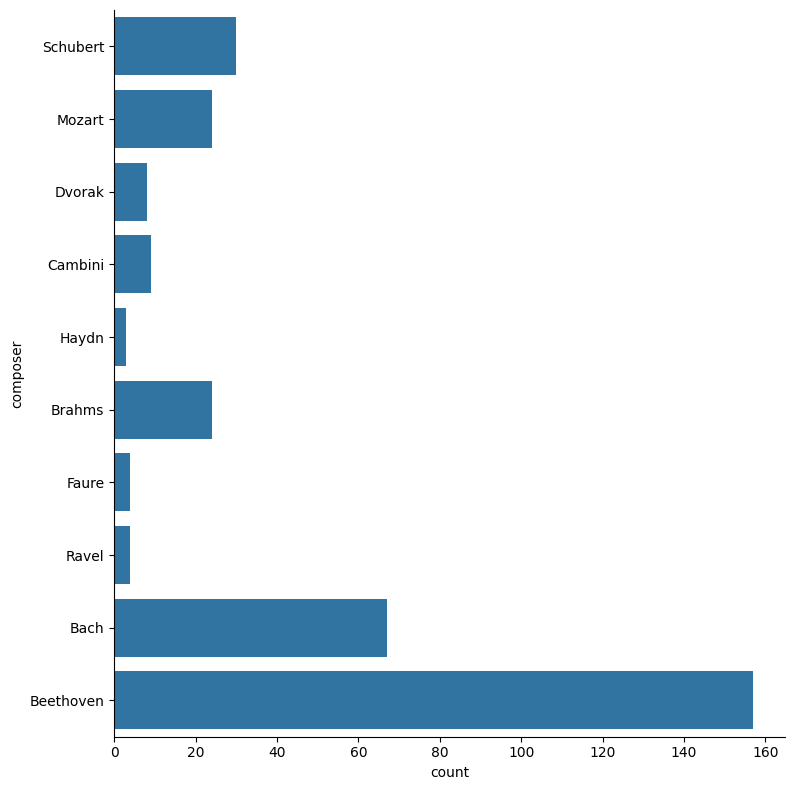

In [3]:
# Composers in the Dataset
print("Number of Composers :", len(csv_data["composer"].unique()))


print(csv_data["composer"].value_counts())
sb.catplot(y = "composer", data = csv_data, kind = "count", height = 8)

Number of Ensemble Types : 21
ensemble
Solo Piano                     156
String Quartet                  57
Accompanied Violin              22
Solo Cello                      12
Solo Violin                      9
Wind Quintet                     9
Piano Quartet                    8
Piano Trio                       7
Accompanied Cello                7
Pairs Clarinet-Horn-Bassoon      6
String Sextet                    5
Piano Quintet                    4
Violin and Harpsichord           4
Wind Octet                       4
Horn Piano Trio                  4
Accompanied Clarinet             4
Solo Flute                       3
Clarinet Quintet                 3
Clarinet-Cello-Piano Trio        3
Wind and Strings Octet           2
Viola Quintet                    1
Name: count, dtype: int64


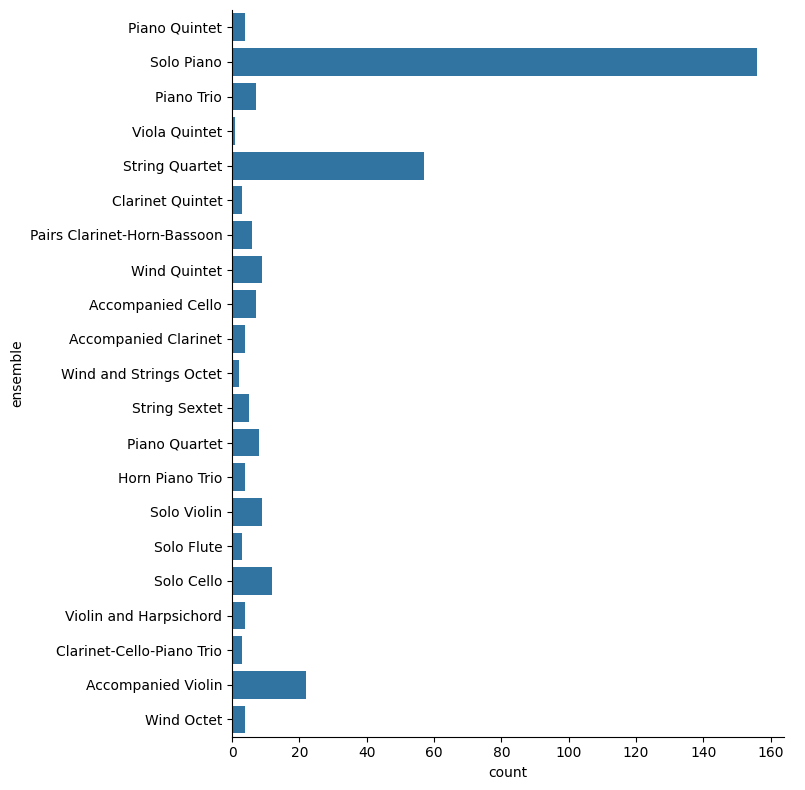

In [4]:
# Ensembles in the Dataset
print("Number of Ensemble Types :", len(csv_data["ensemble"].unique()))

print(csv_data["ensemble"].value_counts())
sb.catplot(y = "ensemble", data = csv_data, kind = "count", height = 8)

We will be selecting audio data whose ensemble is `Solo Piano`, `Solo Violin` or `Solo Cello` as our training data, as these data can best represent the characteristics of each intrument without interference from other instruments

In [5]:
# Duration of datasets
duration = pd.DataFrame(csv_data['seconds'])
duration.describe()

seconds
count   330.000000
mean    371.845455
std     195.721571
min      55.000000
25%     226.250000
50%     351.500000
75%     475.750000
max    1069.000000

<Axes: >

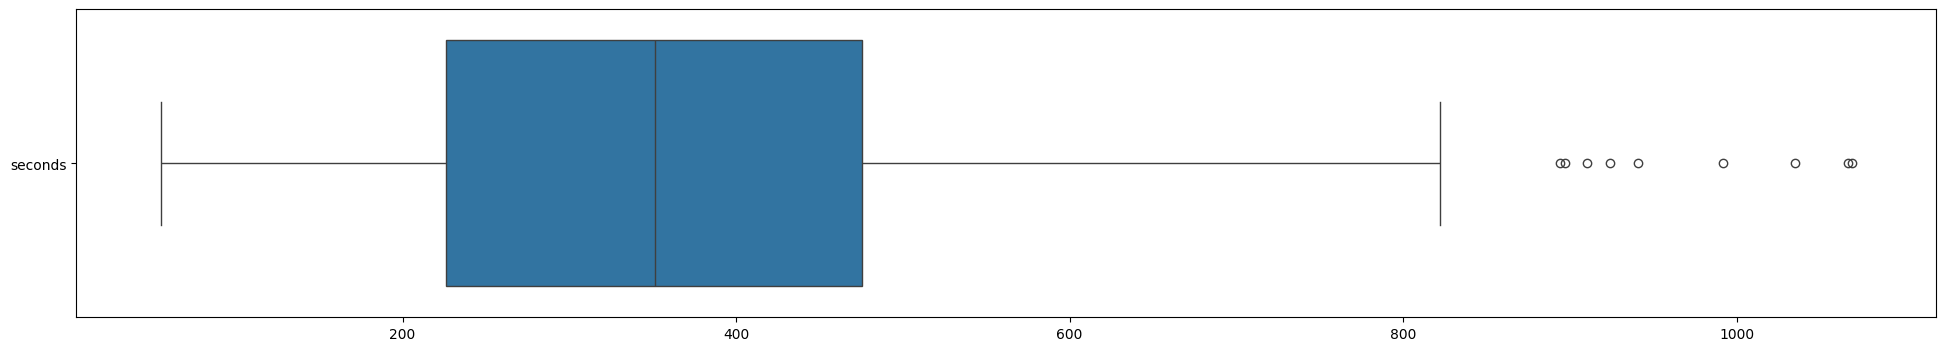

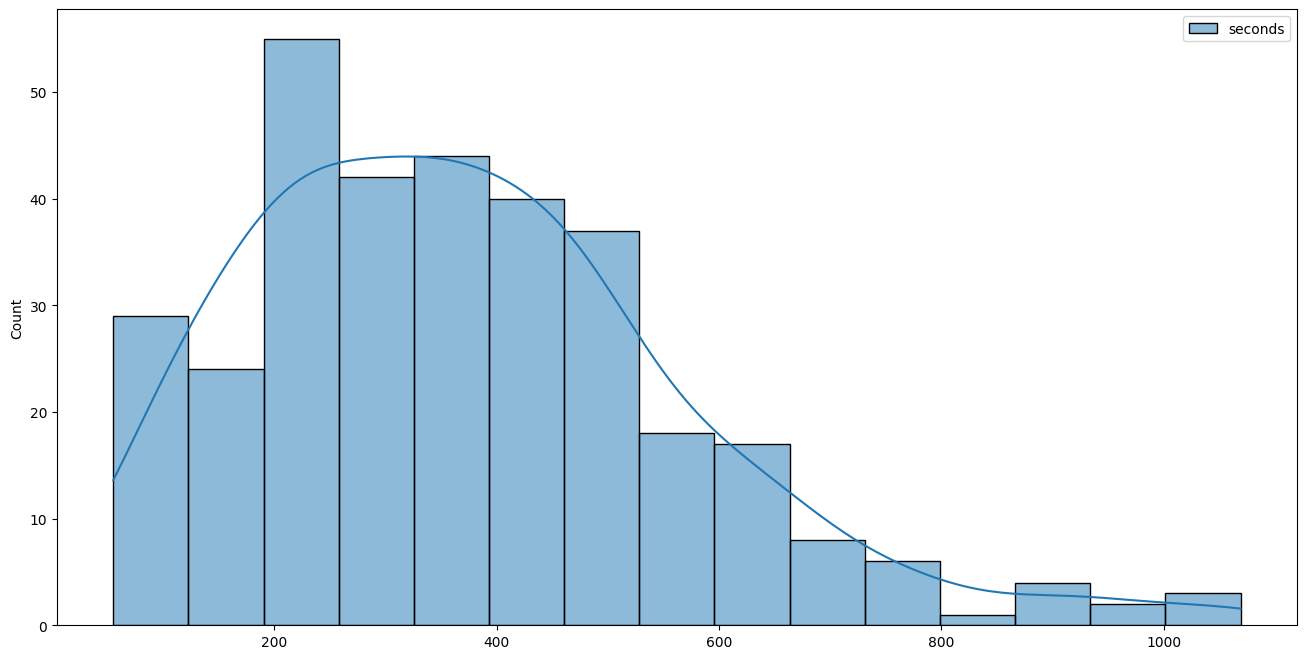

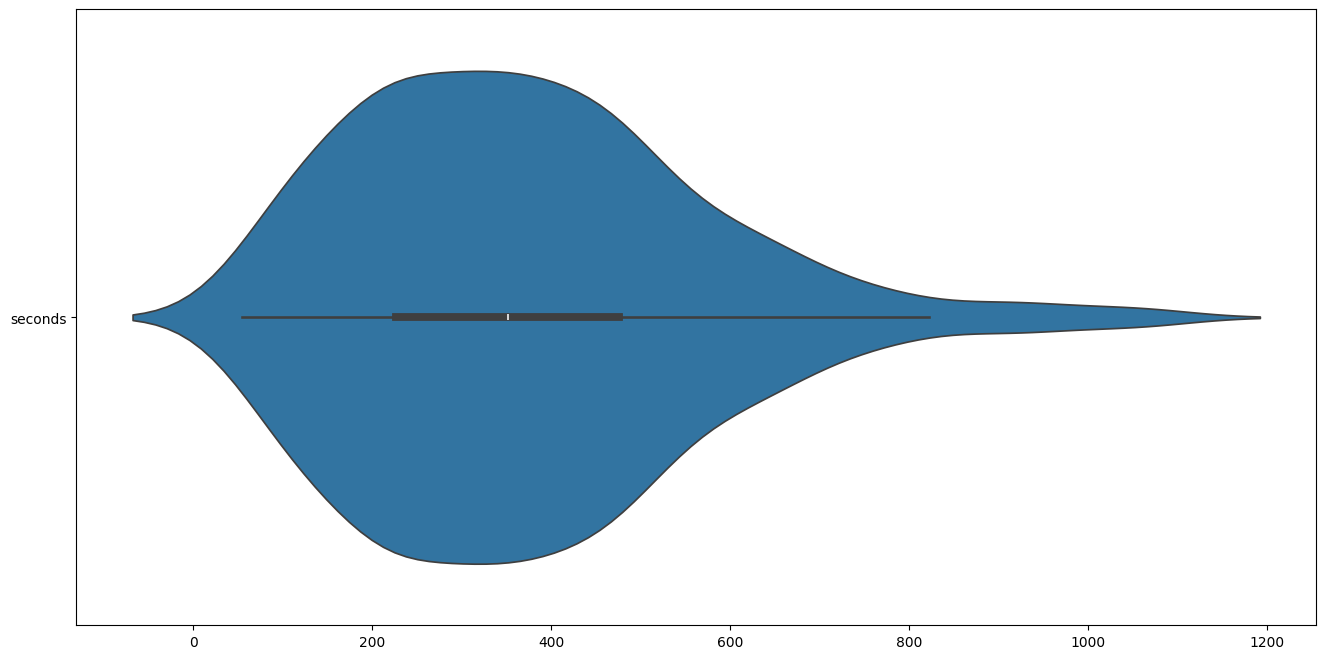

In [6]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = duration, orient = "h")

f = plt.figure(figsize=(16, 8))
sb.histplot(data = duration, kde = True)

f = plt.figure(figsize=(16, 8))
sb.violinplot(data = duration, orient = "h")

As the durations of the audio data files are rather dispersed, we will split each audio file into several 1 second files for EDA and training to ensure homogeneity.

---
## Exploratory Data Analysis on Audio Dataset
Next, we will do EDA on the audio files themselves. This will help us to understand the basic properties of the audio, identify patterns among sounds created by the same intrument, and summarise their main characteristics. This process will help in formulating our hypotheses, detecting outliers, and discovering insights that could be useful for machine learning model development.

### Essential Libraries and Modules

We will import some more essential Python Libraries and Modules that will be used for audio analysis

> `Librosa` : Library for audio and music analysis, provides tools for music and audio processing, such as loading audio files, extracting features, manipulating audio signals, and more   
> `Librosa.display` : Submodule of Librosa, specifically designed for visualisations related to audio signals. It provides functionality to display waveforms, spectrograms, and other audio-related visualisations that integrate with matplotlib  
> `random` : A Module part of Python's standard utility modules, used to generate random numbers  
> `glob` : A module that finds all the pathnames matching a specified pattern  
> `os` : Module that provides a way of using operating system dependent functionality, like reading or writing to the file system, managing paths, etc

In [9]:
import librosa
import librosa.display
import random
import glob
import os

### Import the audio data
We will load the data that has already been split into 1 second files. Librosa loads the audio data as a floating point time series. It also returns the sample rate used, which has a default value of 22050

In [12]:
cello_audio = []
cello_sr = []
piano_audio = []
piano_sr = []
violin_audio = []
violin_sr = []

# file paths have to be changed accordingly
for wav_file in glob.glob(os.path.join('split/Cello', '*.wav')):
    audio, sr = librosa.load(wav_file)
    cello_audio.append(audio)
    cello_sr.append(sr)

for wav_file in glob.glob(os.path.join('split/Piano', '*.wav')):
    audio, sr = librosa.load(wav_file)
    piano_audio.append(audio)
    piano_sr.append(sr)

for wav_file in glob.glob(os.path.join('split/Violin', '*.wav')):
    audio, sr = librosa.load(wav_file)
    violin_audio.append(audio)
    violin_sr.append(sr)

---
## Waveform and Spectrography
Waveforms visualise the amplitude of audio signals over time, which can give insights into loudness and energy. Spectrograms represent the frequency content of the audio over time, which is useful for identifying different sounds. We will plot the waveforms and spectrograms of 9 random audio samples for each instrument.

**Cello:**

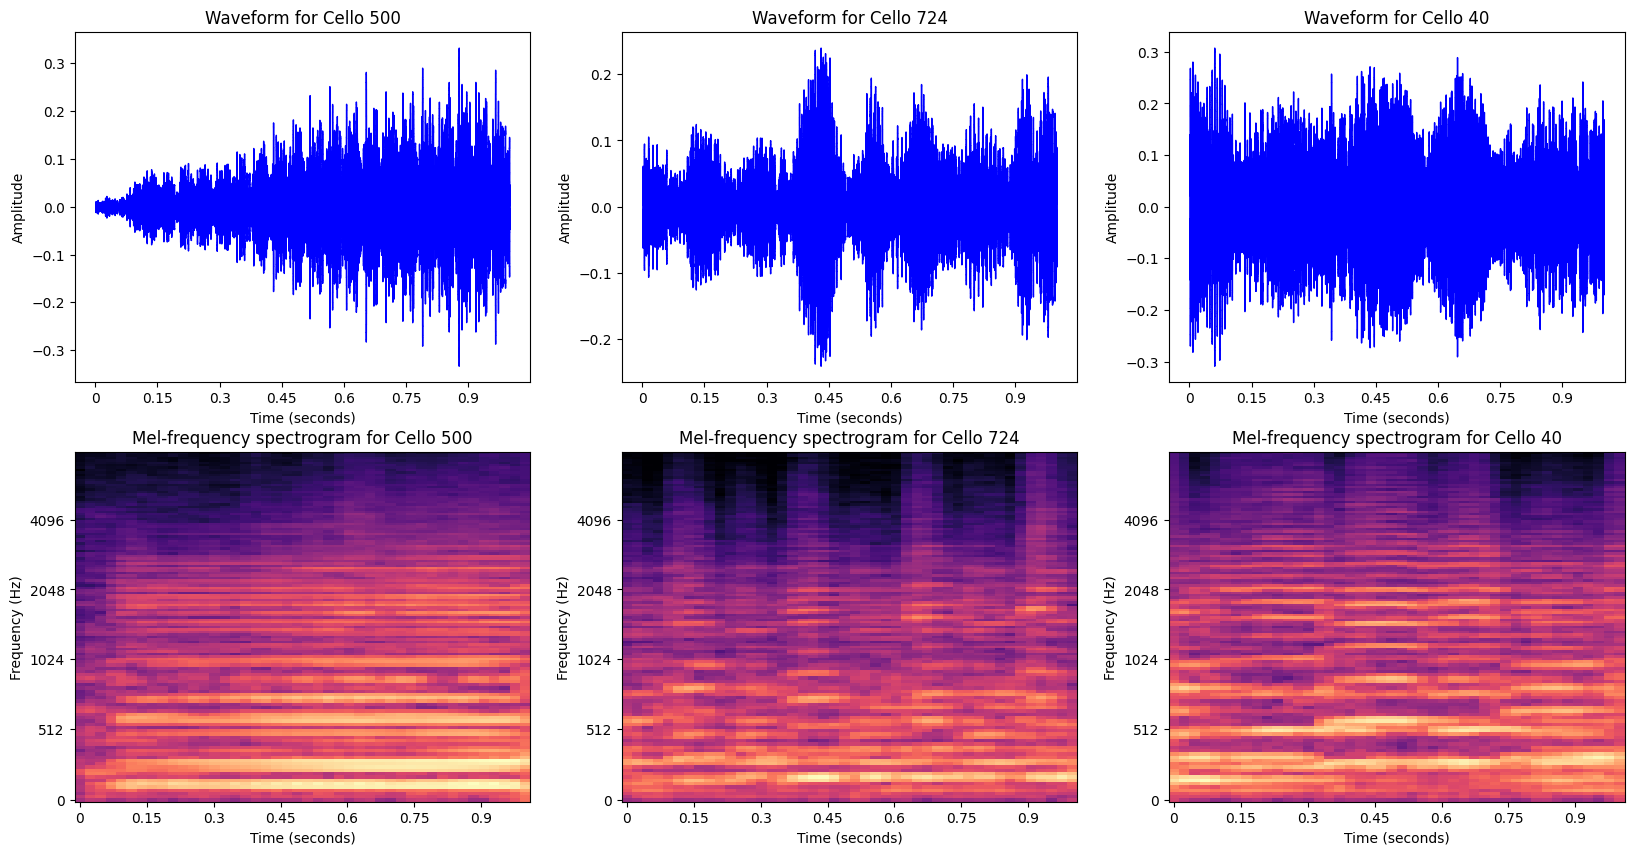

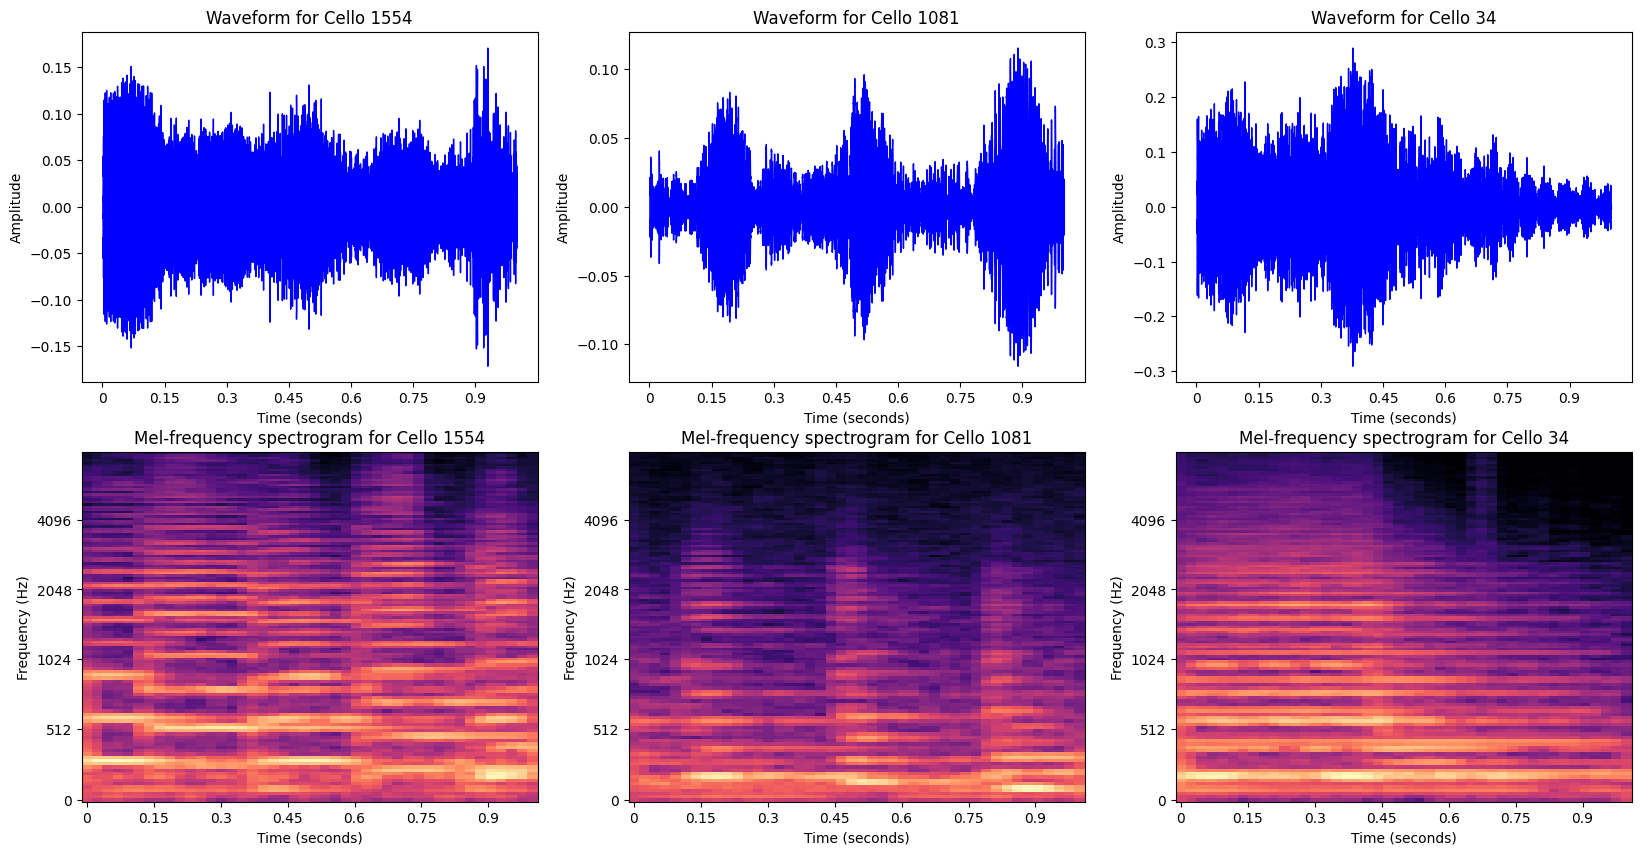

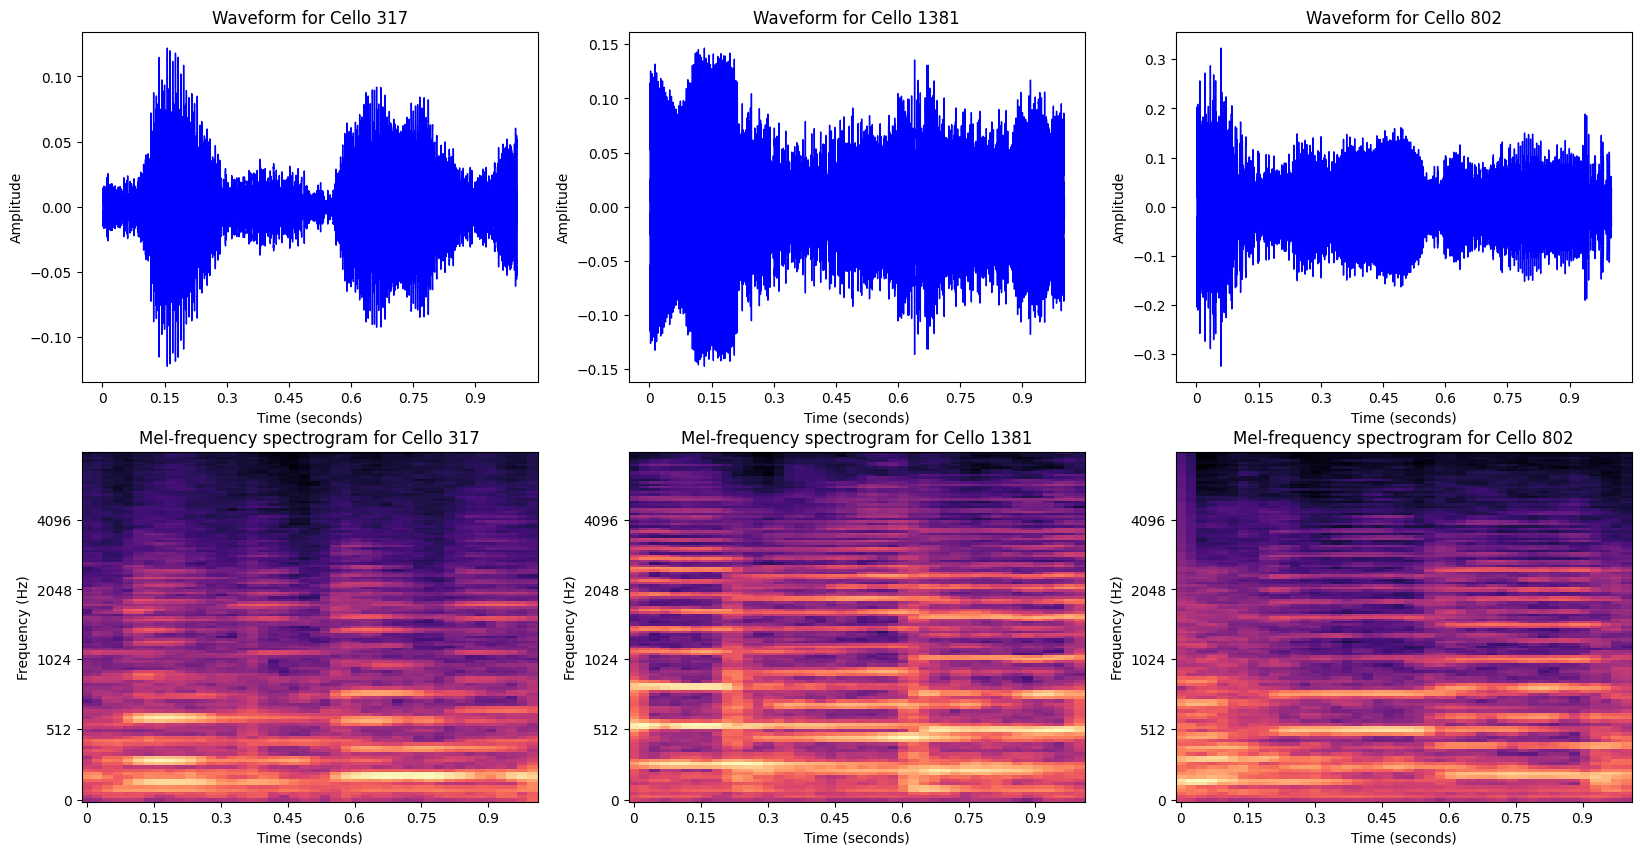

In [16]:
for x in range(3):
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    for i in range(3):    
        f = random.randint(0,1597)
        
        # waveform
        librosa.display.waveshow(cello_audio[f], sr=cello_sr[f], ax=ax[0,i], color='blue')
        ax[0,i].set_title('Waveform for Cello '+str(f))
        ax[0,i].set_xlabel('Time (seconds)')
        ax[0,i].set_ylabel('Amplitude')
    
        # spectrogram
        S = librosa.feature.melspectrogram(y=cello_audio[f], sr=cello_sr[f], n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=cello_sr[f], x_axis='time', y_axis='mel', fmax=8000, ax=ax[1,i])
        ax[1,i].set_title('Mel-frequency spectrogram for Cello '+str(f))
        ax[1,i].set_xlabel('Time (seconds)')
        ax[1,i].set_ylabel('Frequency (Hz)')

plt.show()

**Piano:**

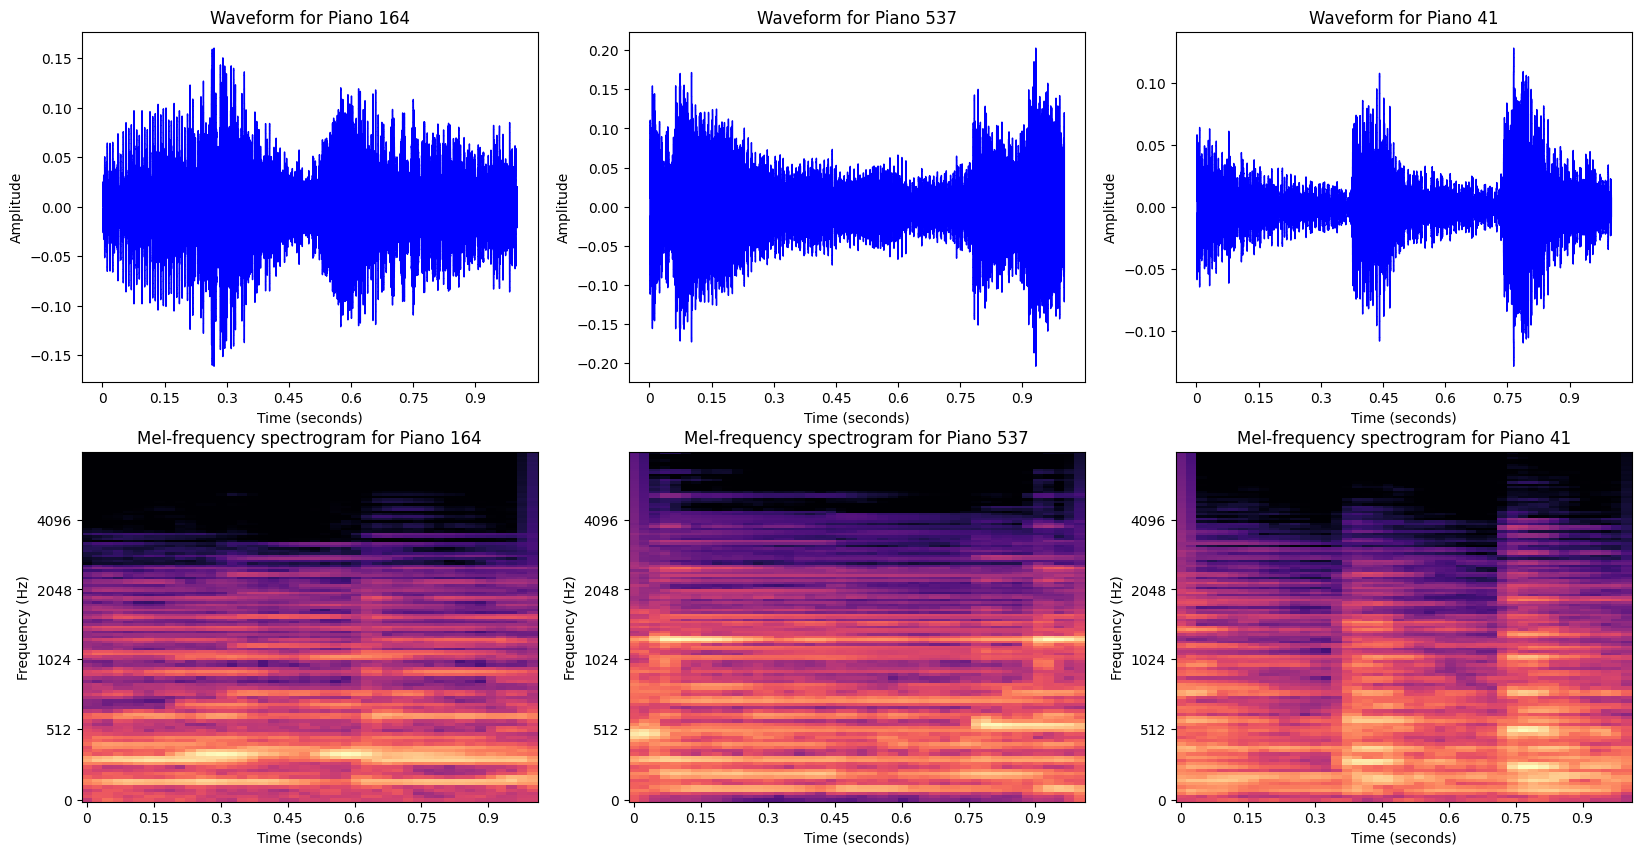

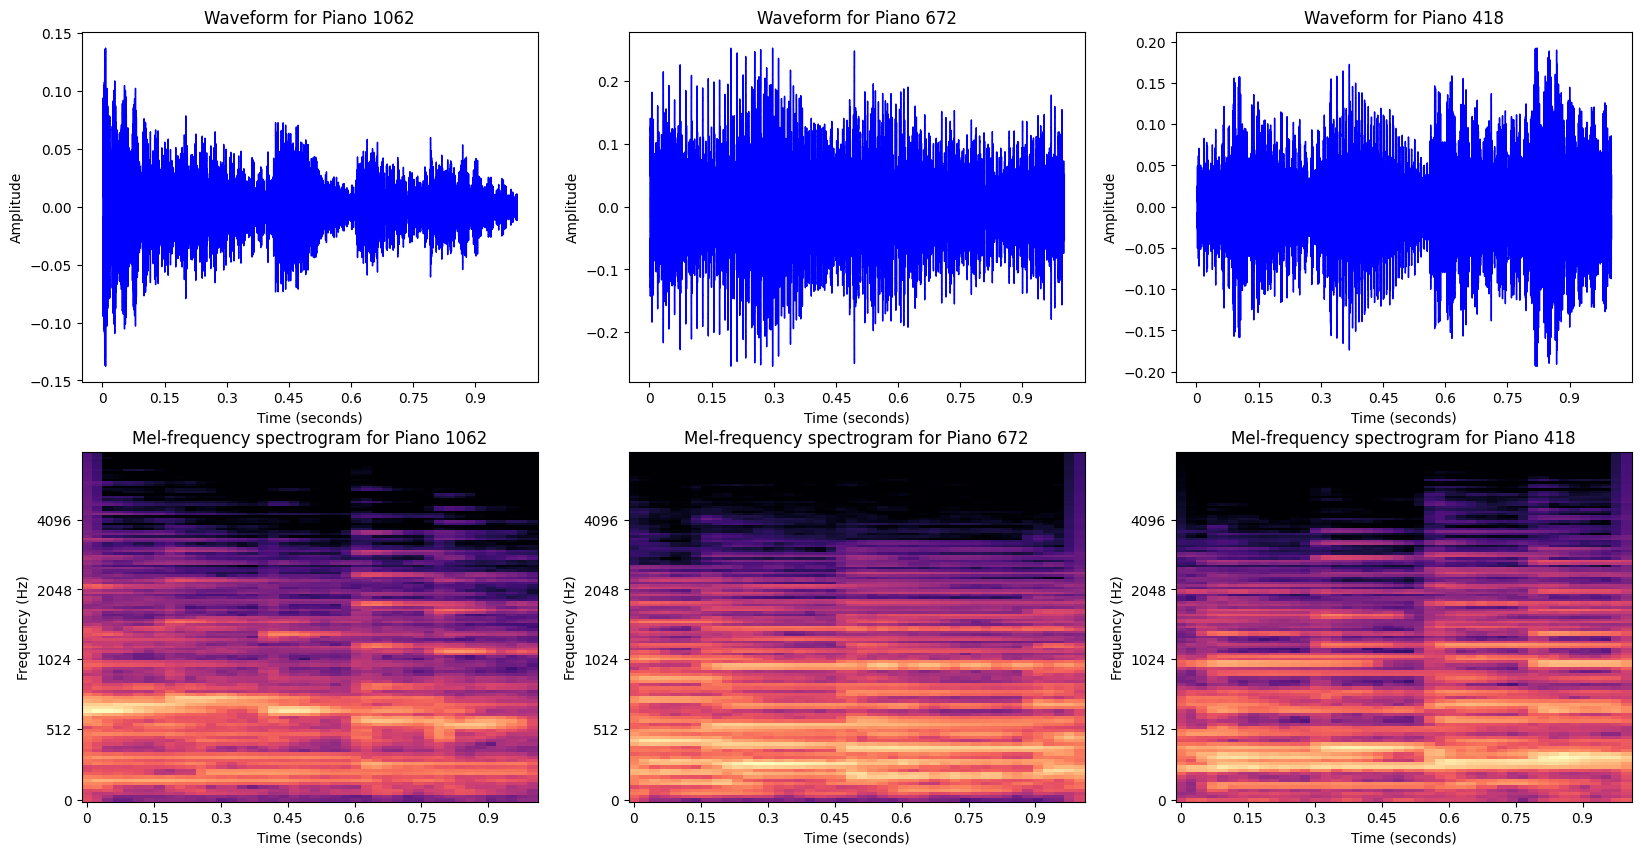

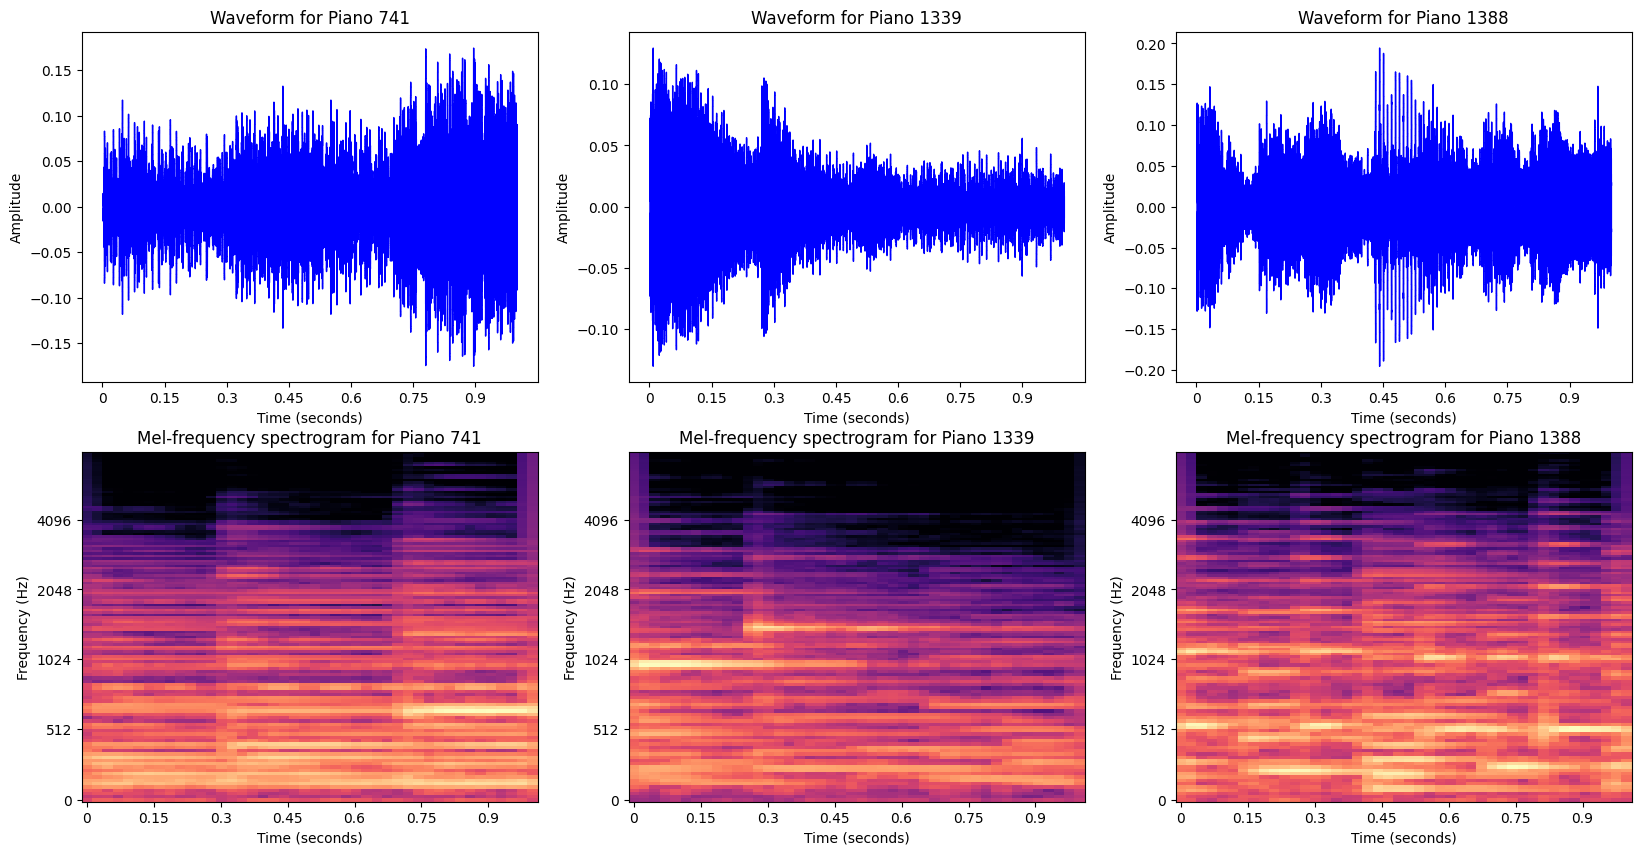

In [17]:
for x in range(3):
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    
    for i in range(3):    
        f = random.randint(0,1597)
    
        # waveform
        librosa.display.waveshow(piano_audio[f], sr=piano_sr[f], ax=ax[0,i], color='blue')
        ax[0,i].set_title('Waveform for Piano '+str(f))
        ax[0,i].set_xlabel('Time (seconds)')
        ax[0,i].set_ylabel('Amplitude')
    
        # spectrogram
        S = librosa.feature.melspectrogram(y=piano_audio[f], sr=piano_sr[f], n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=piano_sr[f], x_axis='time', y_axis='mel', fmax=8000, ax=ax[1,i])
        ax[1,i].set_title('Mel-frequency spectrogram for Piano '+str(f))
        ax[1,i].set_xlabel('Time (seconds)')
        ax[1,i].set_ylabel('Frequency (Hz)')

plt.show()

**Violin:**

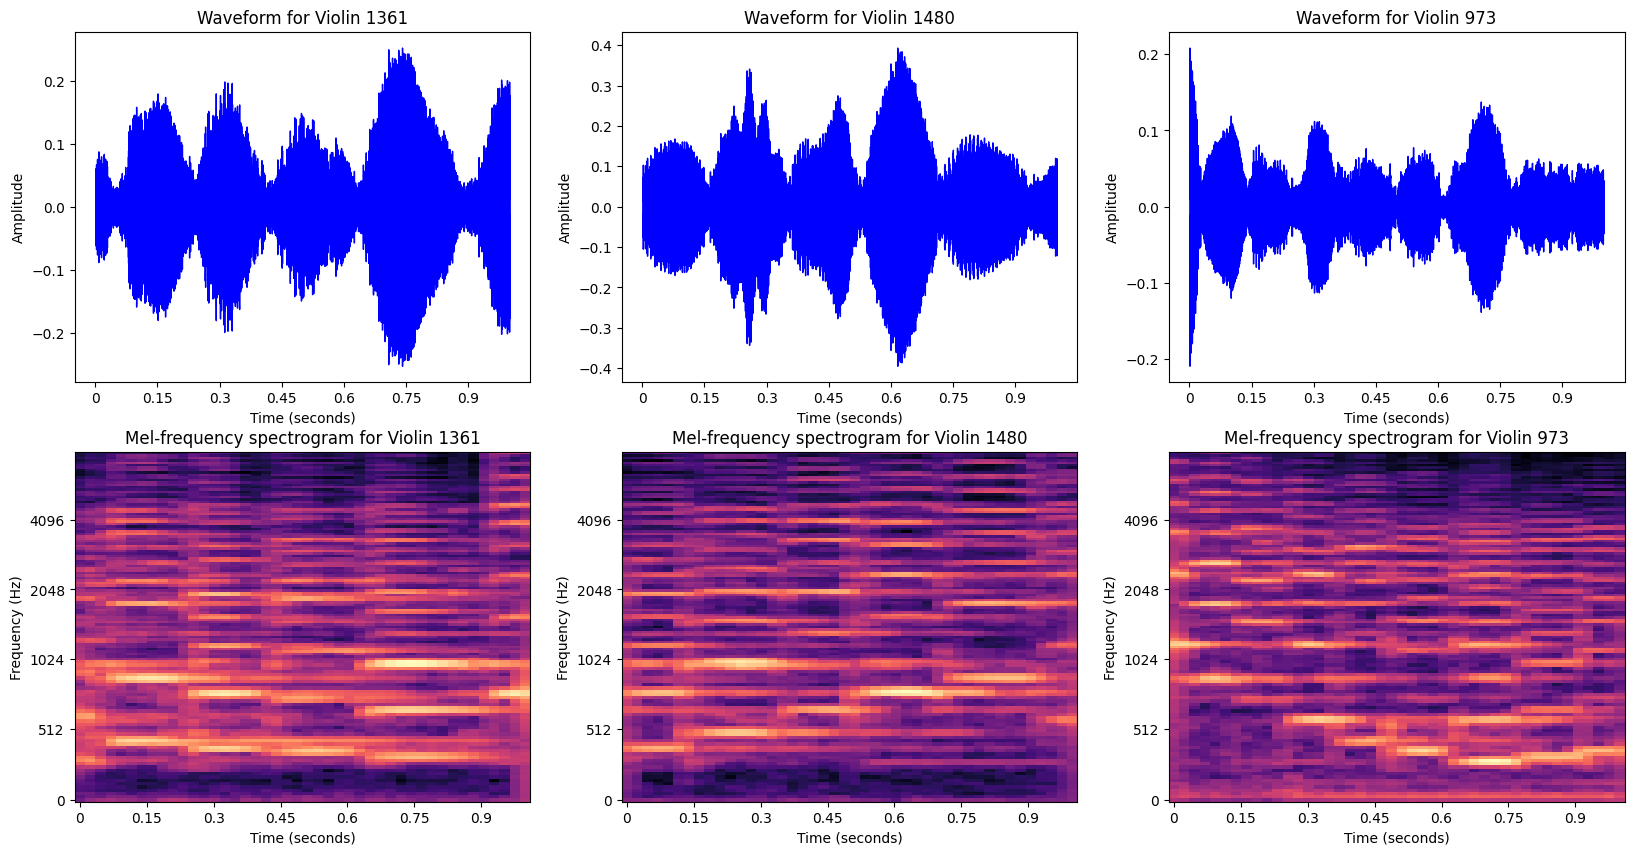

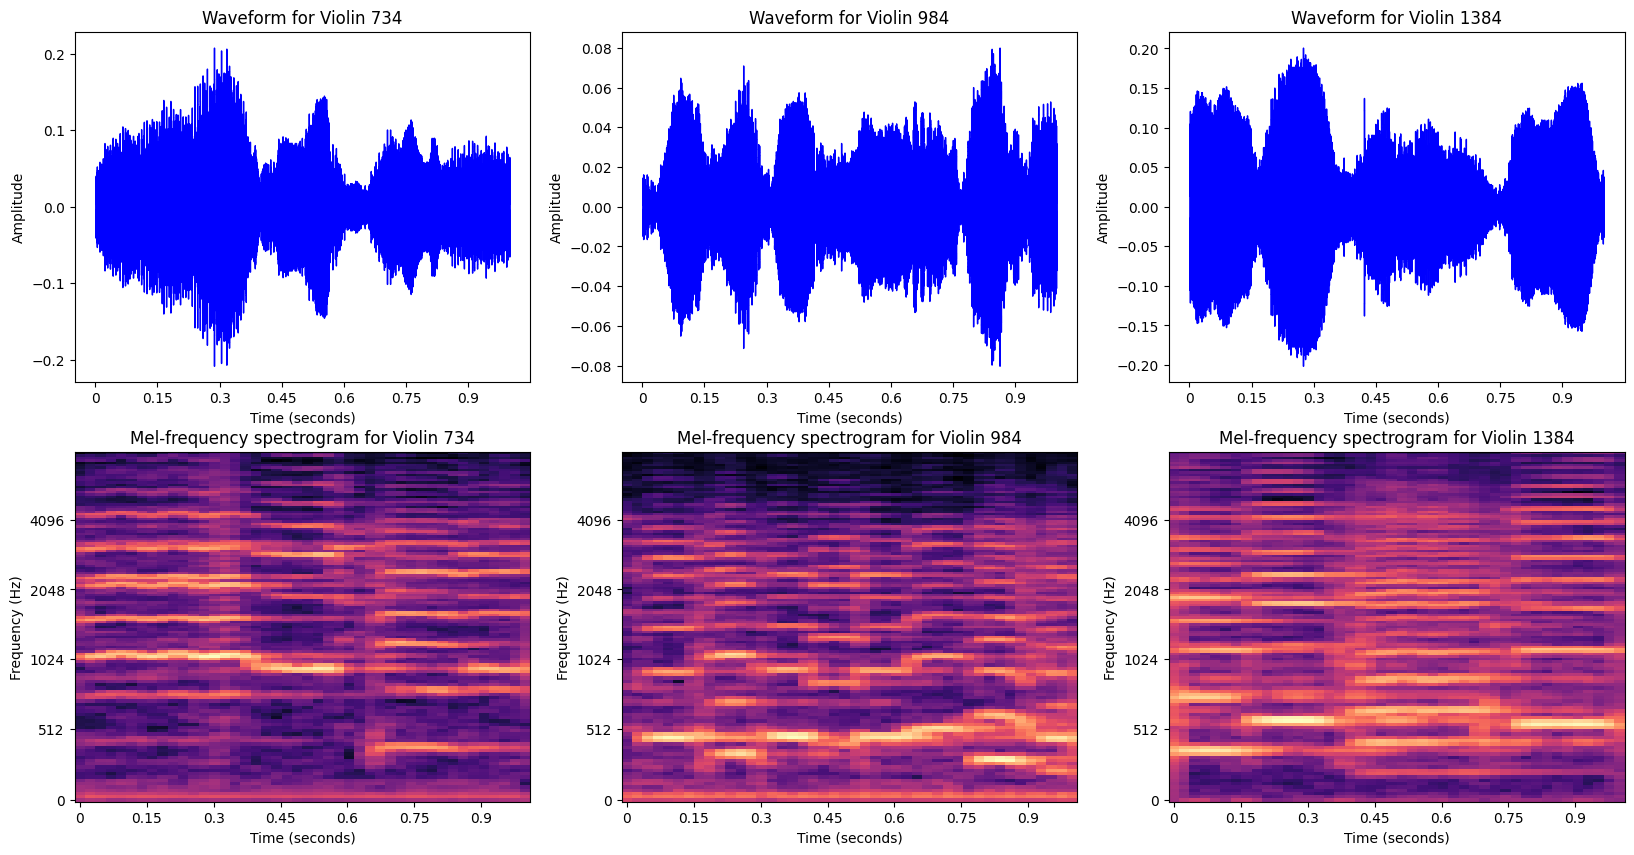

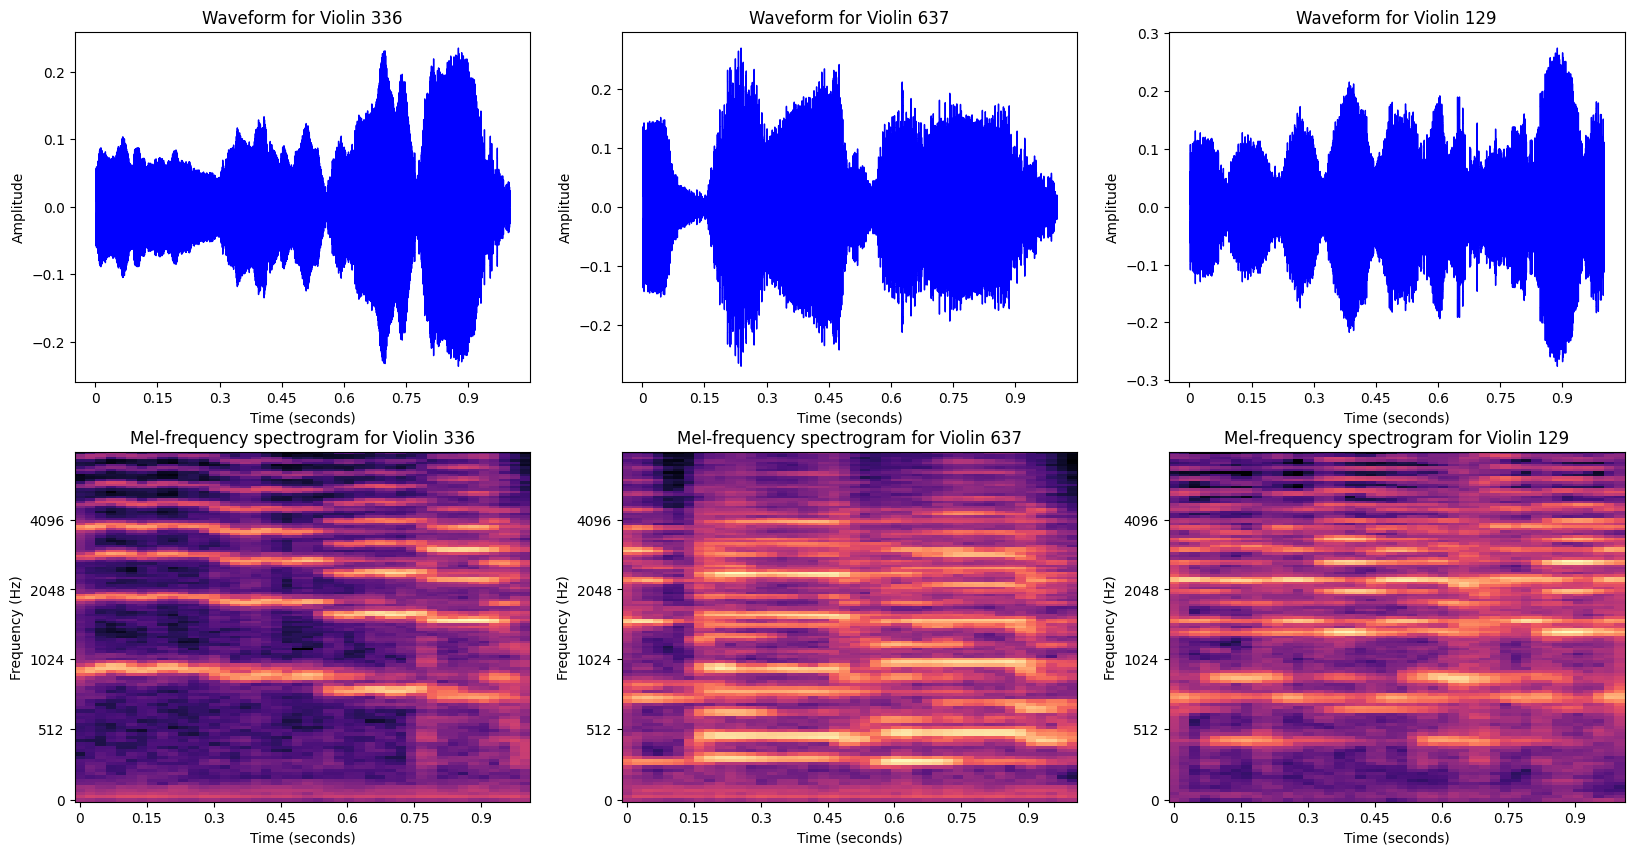

In [18]:
for x in range(3):
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    
    for i in range(3):    
        f = random.randint(0,1597)
    
        # waveform
        librosa.display.waveshow(violin_audio[f], sr=violin_sr[f], ax=ax[0,i], color='blue')
        ax[0,i].set_title('Waveform for Violin '+str(f))
        ax[0,i].set_xlabel('Time (seconds)')
        ax[0,i].set_ylabel('Amplitude')
    
        # spectrogram
        S = librosa.feature.melspectrogram(y=violin_audio[f], sr=violin_sr[f], n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=violin_sr[f], x_axis='time', y_axis='mel', fmax=8000, ax=ax[1,i])
        ax[1,i].set_title('Mel-frequency spectrogram for Violin '+str(f))
        ax[1,i].set_xlabel('Time (seconds)')
        ax[1,i].set_ylabel('Frequency (Hz)')

plt.show()

**Analysis**  
It can be seen that the waveforms vary for each file regardless of the type of instrument, hence the amplitude variations of the audio might not give helpful insights to its intrument.   
On the other hand, for the spectrograms, the brightness or darkness of the horizontal lines represents the energy of the sound at those frequencies, with brighter colors meaning higher energy. The spectrograms for Cello and Piano show clearer series of horizontal lines, which suggests the presence of distinct pitches or notes. The spectrograms for Cello and Violin show bright horizontal lines at a wider range of frequencies, which represent the harmonic series of the notes being played, which is typical for string instruments. The vertical patterns indicate changes over time, and is seen more prominently in the spectrograms for Cello and Violin, which could be due to variations in bow movement or techniques like vibrato, which are unique to string instruments.

---
### Mel-Frequency Cepstral Coefficients (MFCCs)
MFCCs visualise the timbral texture of the audio, which is helpful in music analysis. Timbre is the quality of a musical note or sound that distinguishes different types of sound production, including musical instruments. It is often referred to as the "color" of the sound. In the heatmaps, the color intensity represents the magnitude of the MFCC values at each point in time. These values are essentially coefficients that describe the shape of the audio signal's power spectrum within each frame.  

**Darker colours (blue)** : Represents lower MFCC values, which indicate less energy at the corresponding cepstral frequency bands  

**Brighter colours (red)** : Represents higher MFCC values, indicating more energy or prominence in the cepstral frequency bands  

**Low-order MFCCs (toward the top of each plot)** : Captures the overall envelope shape of the spectral energy distribution  

**High-order MFCCs (toward the bottom of each plot)** : Captures finer details of the timbre    

We will also plot the MFCCs of 9 random samples of each instrument, then compare them.. them.

**Cello:**

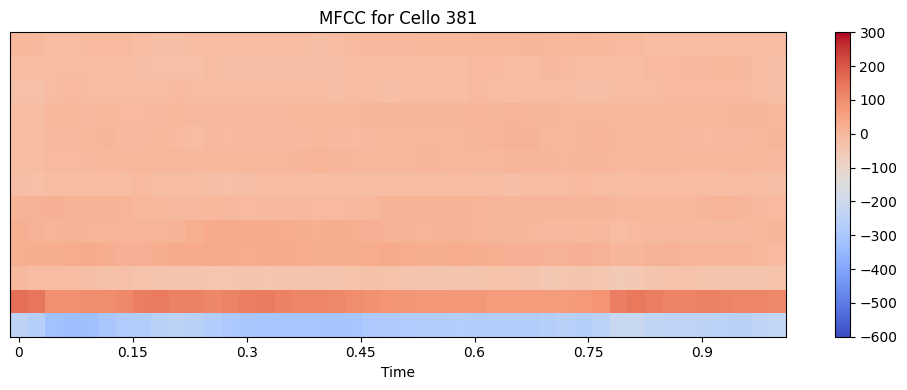

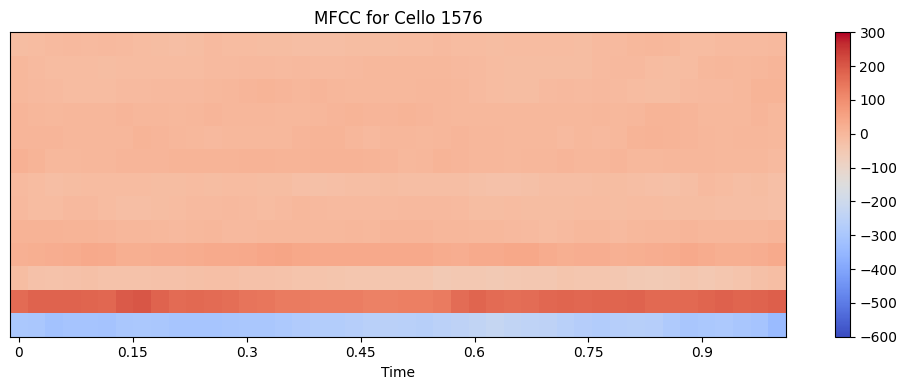

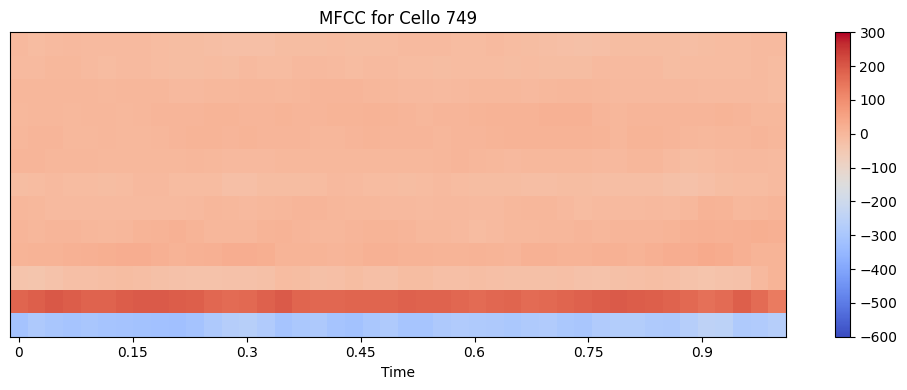

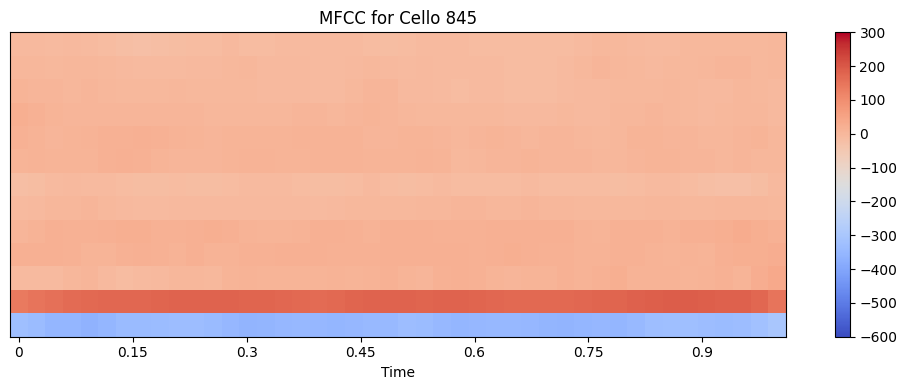

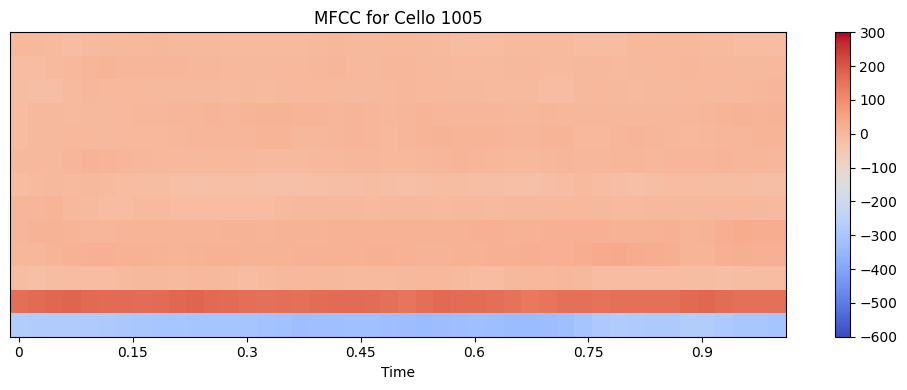

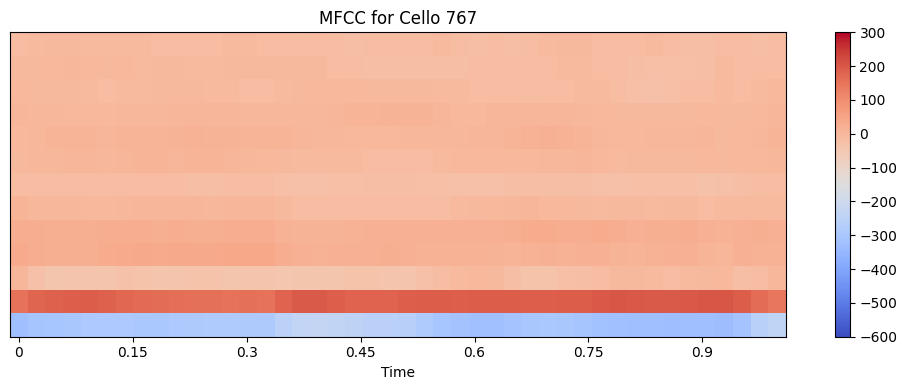

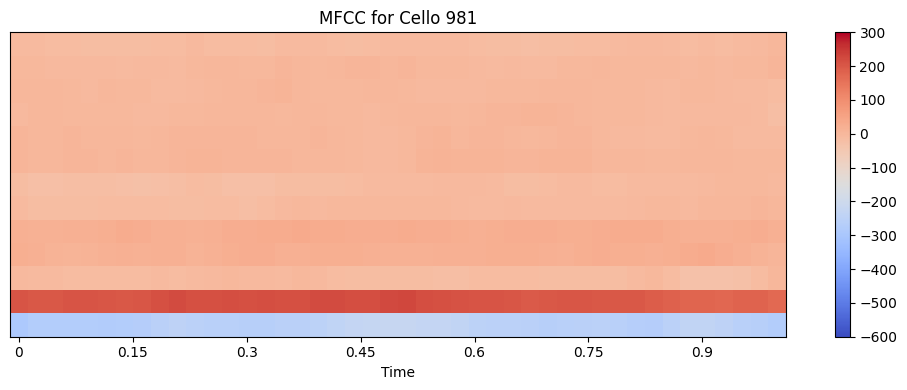

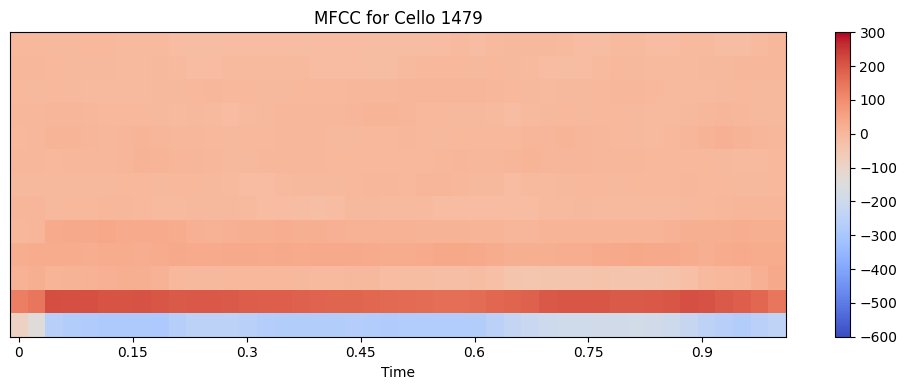

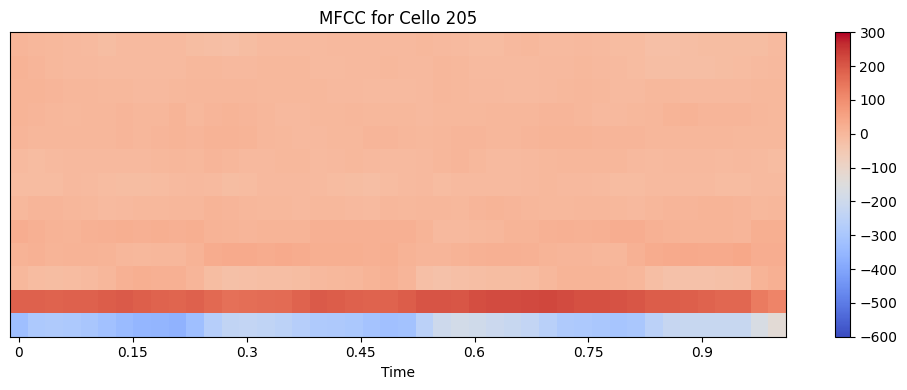

In [26]:
for i in range(9):    
    f = random.randint(0,1597)
    mfccs = librosa.feature.mfcc(y=cello_audio[f], sr=cello_sr[f], n_mfcc=13)  # compute 13 MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=cello_sr[f], vmin=-600, vmax=300)
    plt.colorbar()
    plt.title('MFCC for Cello '+str(f))
    plt.tight_layout()
    plt.show()

**Piano:**

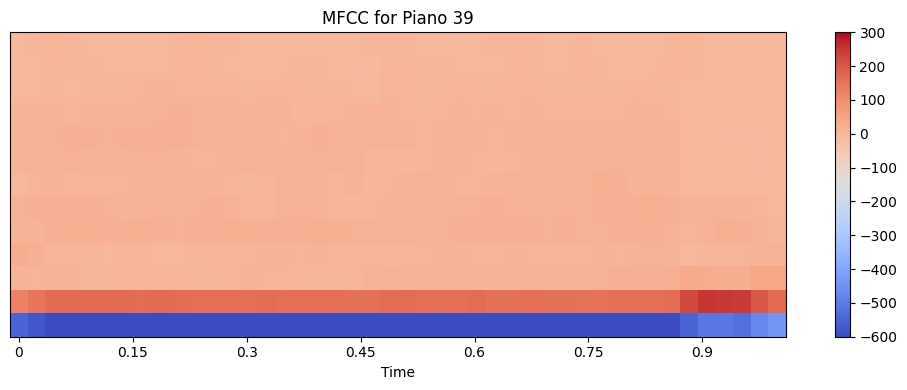

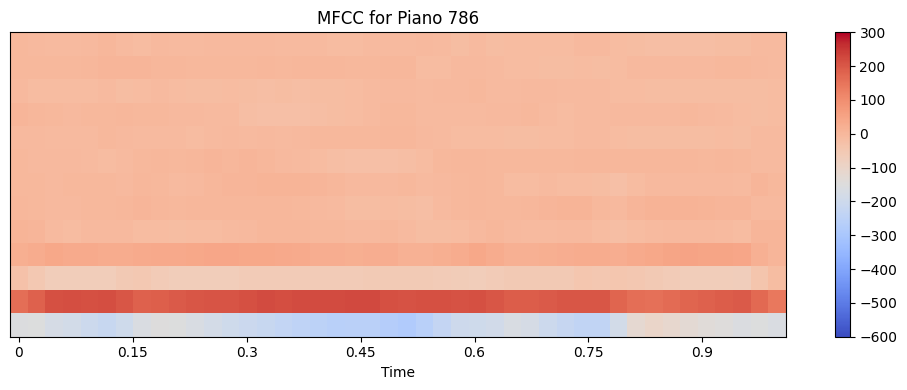

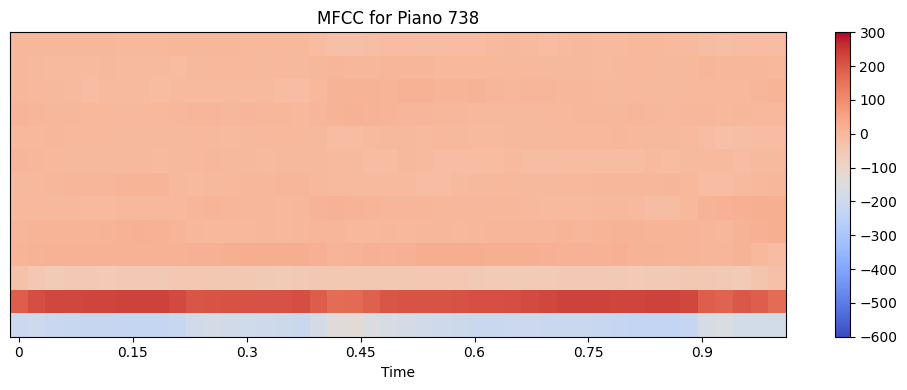

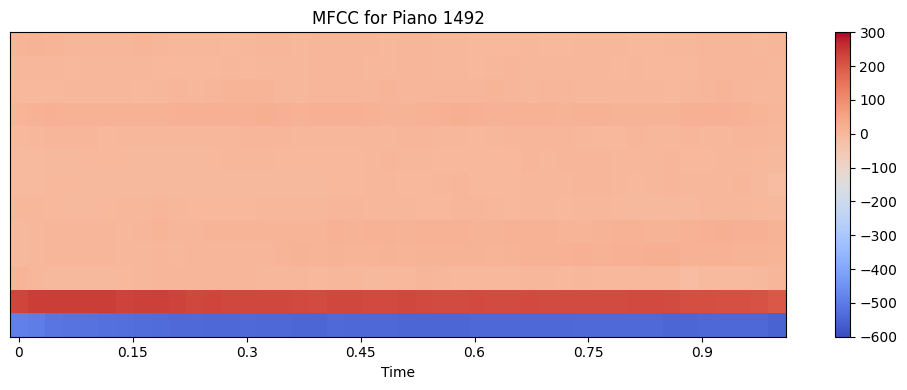

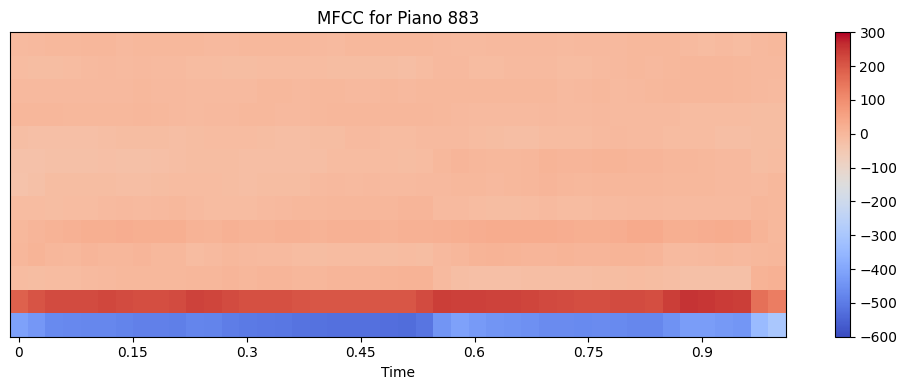

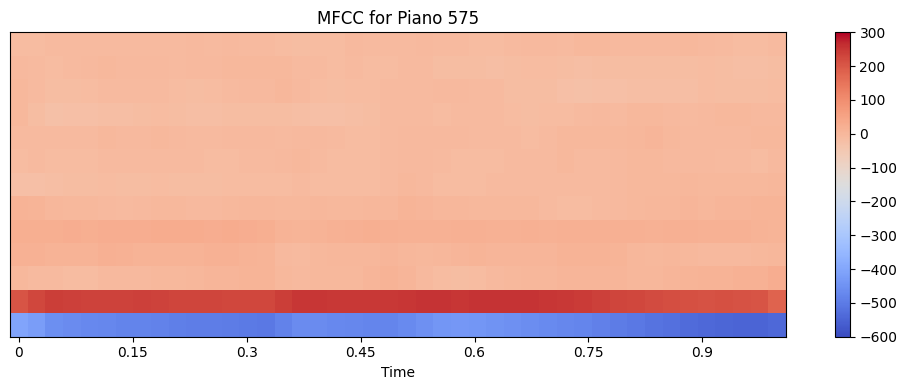

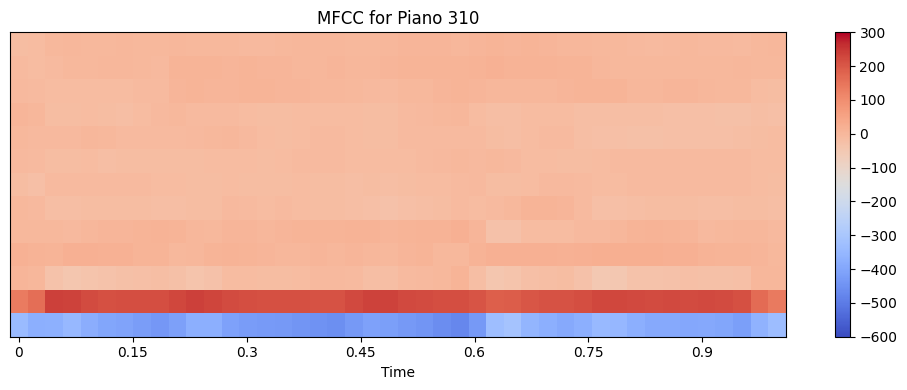

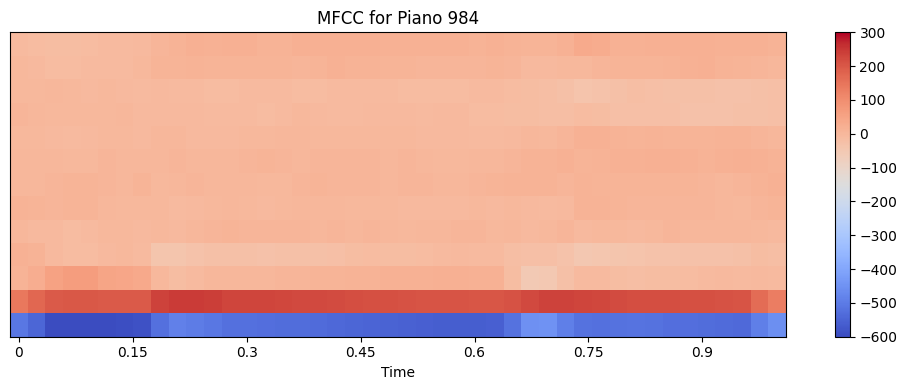

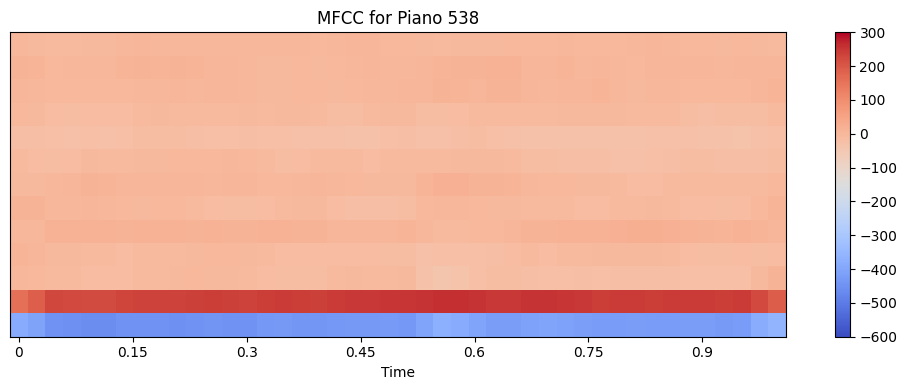

In [27]:
for i in range(9):    
    f = random.randint(0,1597)
    mfccs = librosa.feature.mfcc(y=piano_audio[f], sr=piano_sr[f], n_mfcc=13)  # compute 13 MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=piano_sr[f], vmin=-600, vmax=300)
    plt.colorbar()
    plt.title('MFCC for Piano '+str(f))
    plt.tight_layout()
    plt.show()

**Violin:**

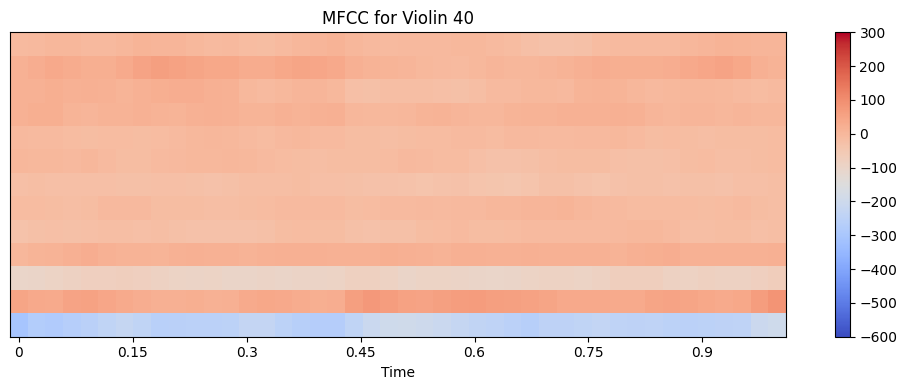

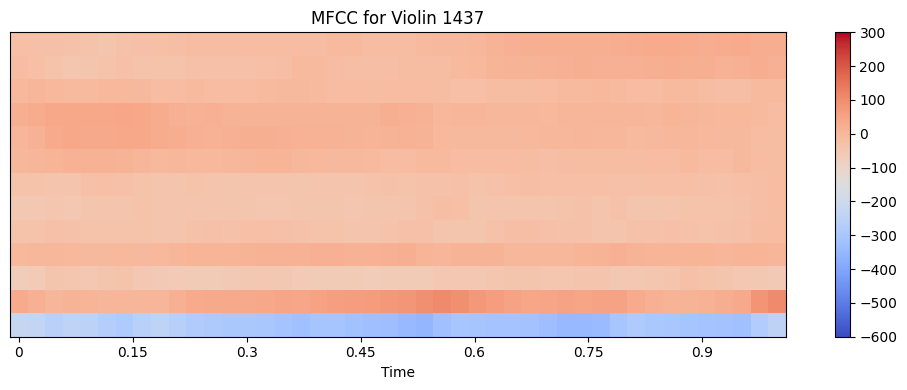

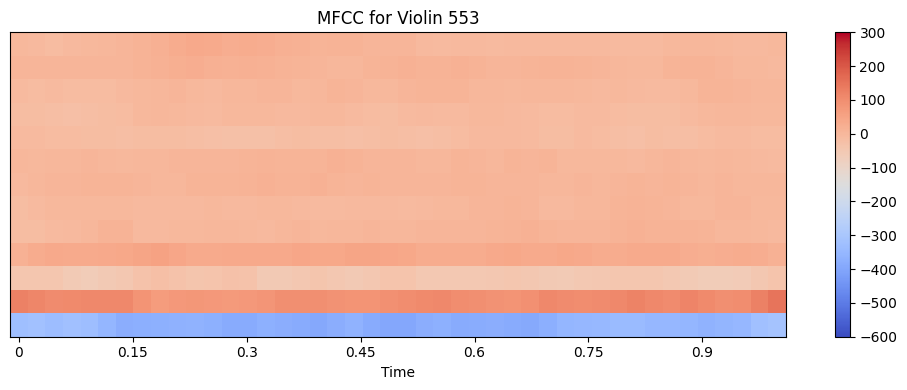

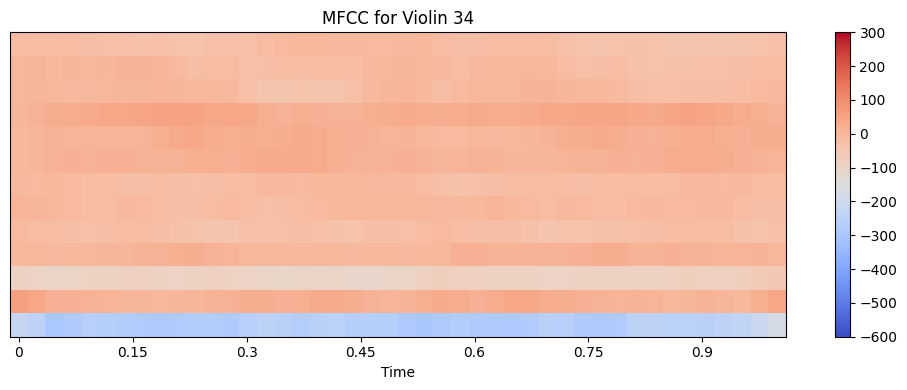

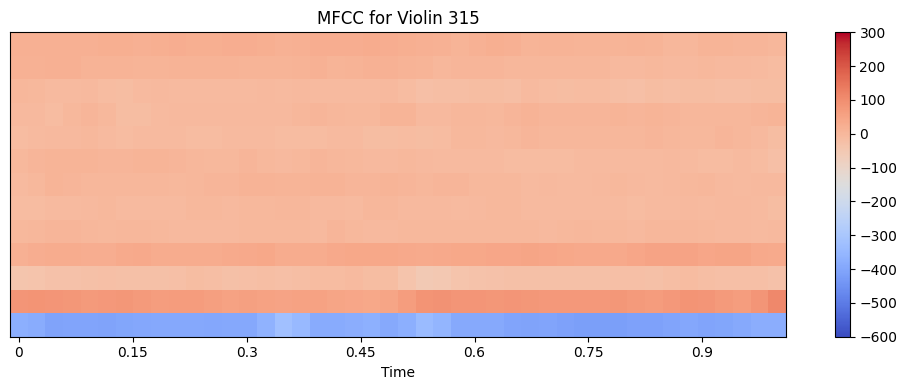

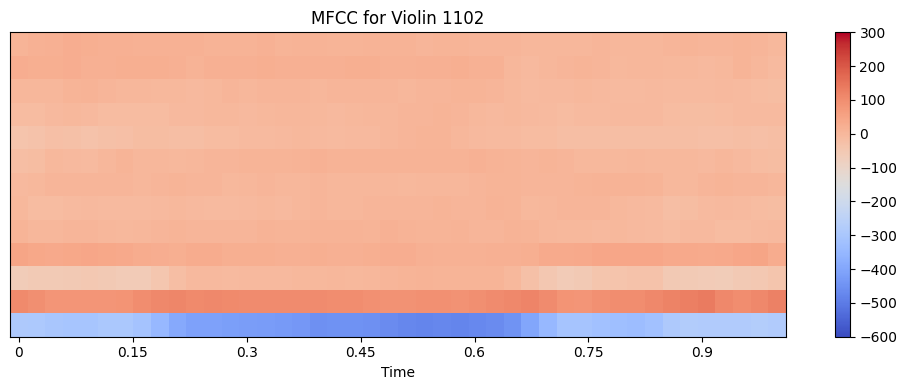

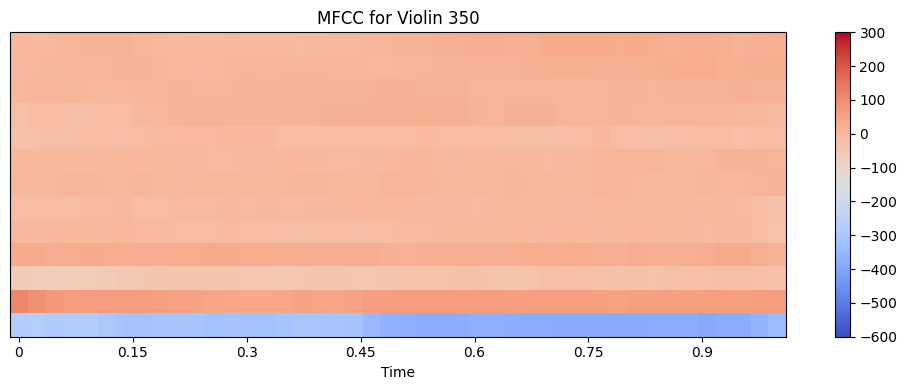

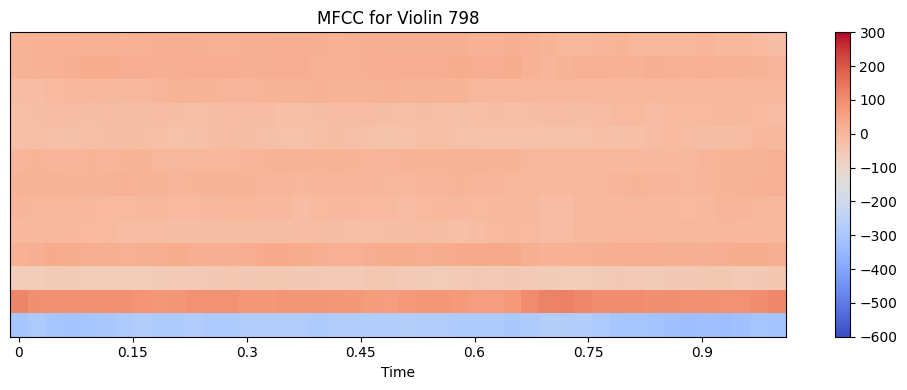

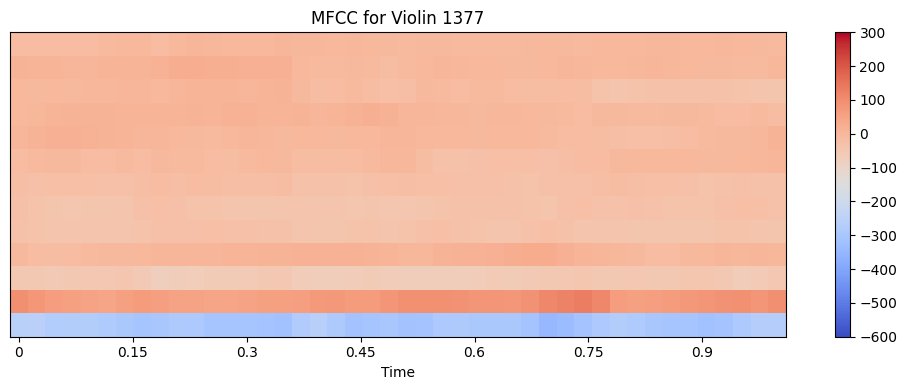

In [28]:
for i in range(9):    
    f = random.randint(0,1597)
    mfccs = librosa.feature.mfcc(y=violin_audio[f], sr=violin_sr[f], n_mfcc=13)  # compute 13 MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=violin_sr[f], vmin=-600, vmax=300)
    plt.colorbar()
    plt.title('MFCC for Violin '+str(f))
    plt.tight_layout()
    plt.show()

**Compare MFCC of the three instruments using a random sample from each:**

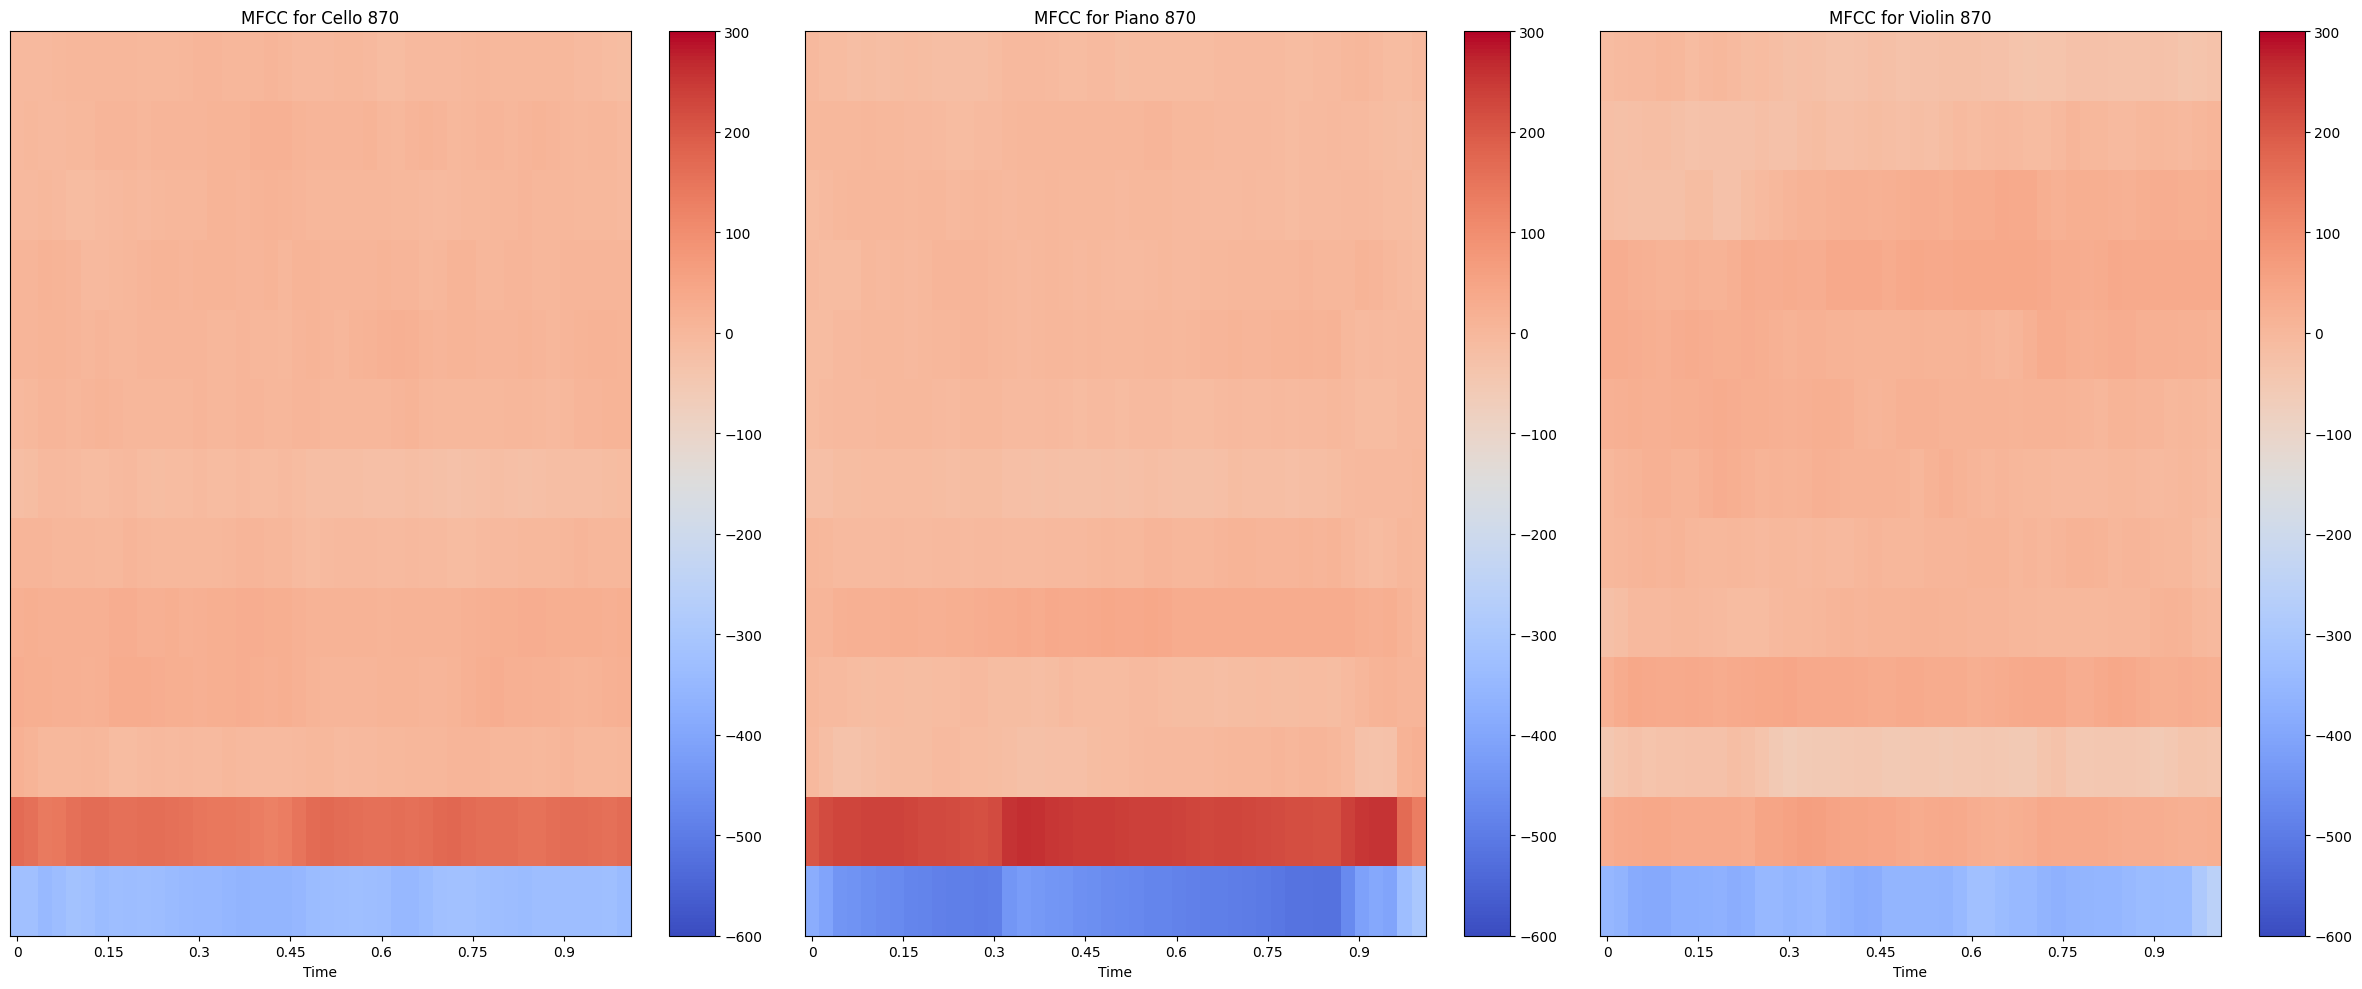

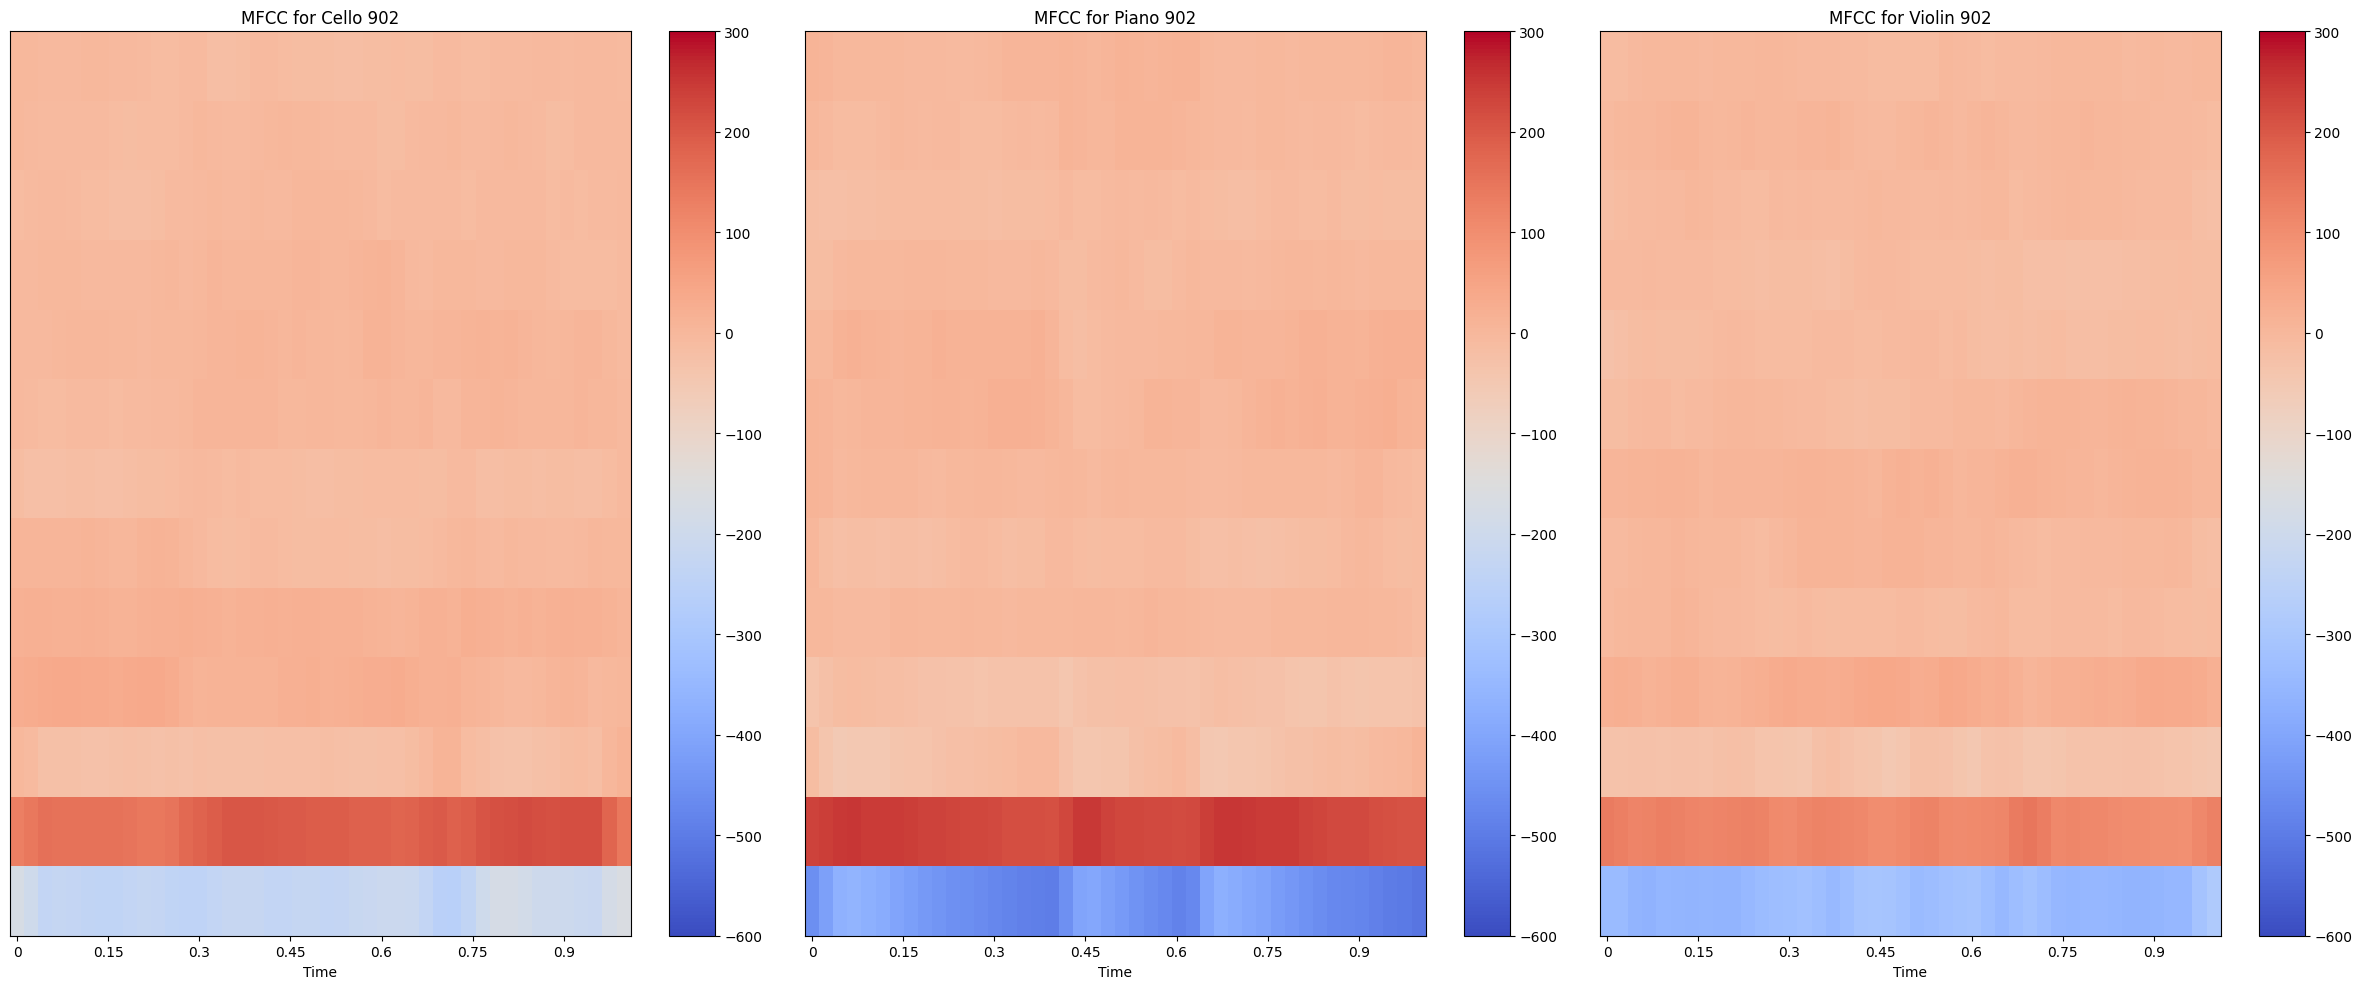

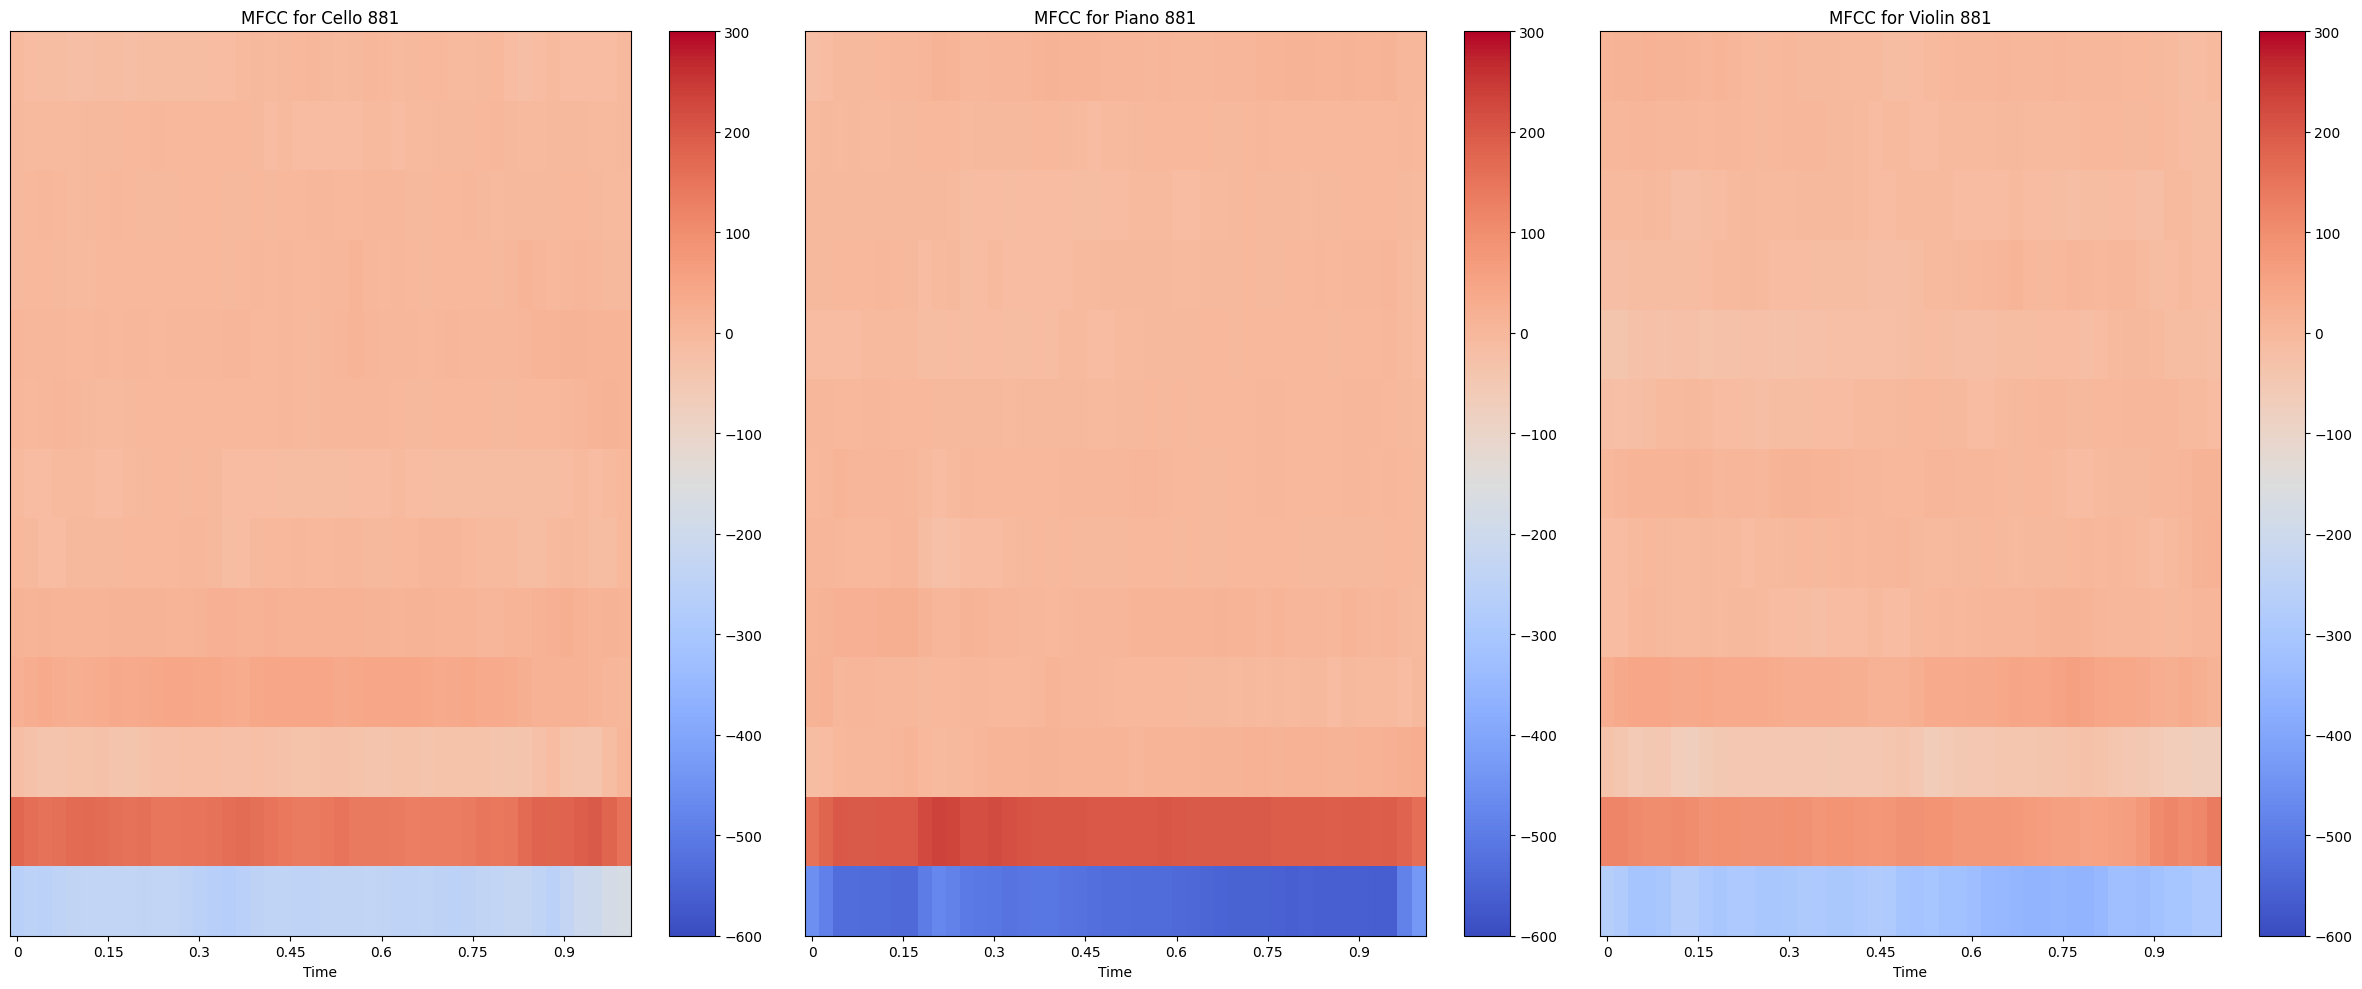

In [34]:
for i in range(3):    
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))
    
    f = random.randint(0, 1597)
    
    # cello
    mfccs = librosa.feature.mfcc(y=cello_audio[f], sr=cello_sr[f], n_mfcc=13)  # compute 13 MFCCs
    c = librosa.display.specshow(mfccs, x_axis='time', sr=cello_sr[f], ax=ax[0], vmin=-600, vmax=300)
    ax[0].set_title('MFCC for Cello '+str(f))
    plt.colorbar(c)
    
    # piano
    mfccs = librosa.feature.mfcc(y=piano_audio[f], sr=piano_sr[f], n_mfcc=13)  # compute 13 MFCCs
    p = librosa.display.specshow(mfccs, x_axis='time', sr=piano_sr[f], ax=ax[1], vmin=-600, vmax=300)
    ax[1].set_title('MFCC for Piano '+str(f))
    plt.colorbar(p)
    
    # violin
    mfccs = librosa.feature.mfcc(y=violin_audio[f], sr=violin_sr[f], n_mfcc=13)  # compute 13 MFCCs
    v = librosa.display.specshow(mfccs, x_axis='time', sr=violin_sr[f], ax=ax[2], vmin=-600, vmax=300)
    ax[2].set_title('MFCC for Violin '+str(f))
    plt.colorbar(v)
    
    plt.tight_layout()
    plt.show()

**Analysis**  
From the heatmaps, Cello and Piano tend to have more extreme values for higher-order MFCCs. While small, Violin audios seem to have more variations across both time and frequency for lower-order MFCCs.

---
### Temporal Envelope
The temporal envelope shows changes in the amplitude and frequency of sound perceived by humans over time. It can show differences in the attack, sustain, decay, and release phases of different instruments' sounds, as these characteristics are unique to each type of instrument.  

For this, we will need to import the Butterworth and filtfilt audio filters from the Scipy library

In [35]:
from scipy.signal import butter, filtfilt

We create a function to apply the Butterworth and filtfilt digital filters to get the temporal envelope of the audio signal

In [36]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    apply a low-pass Butterworth filter to the input data
    
    parameters:
    - data: the audio signal
    - cutoff: cutoff frequency of the filter
    - fs: sampling rate of the audio signal
    - order: order of the filter
    
    returns:
    - filtered signal
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

We then plot the temporal envelopes of 3 random samples of the three instruments.

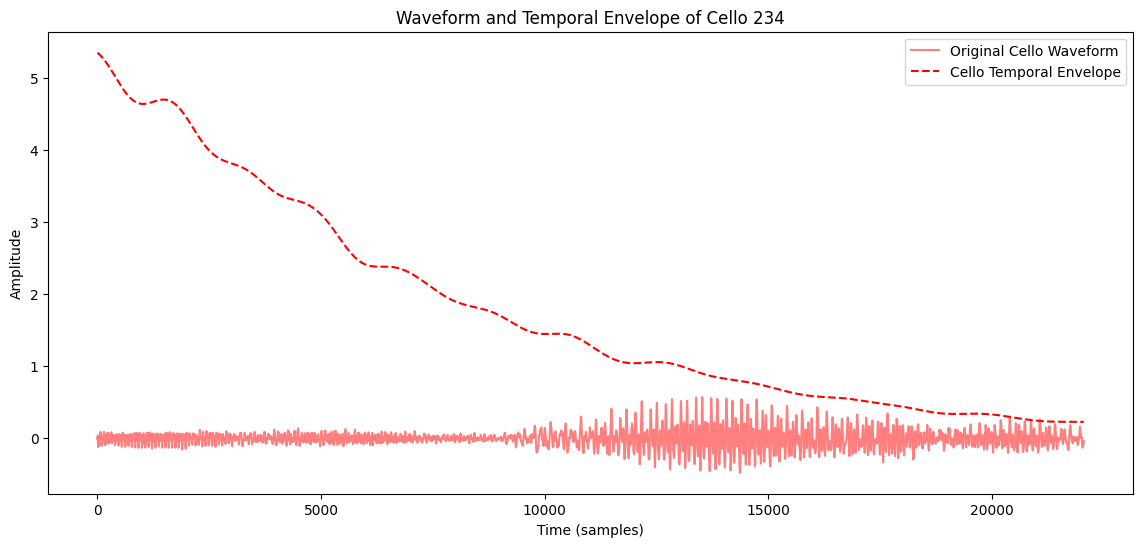

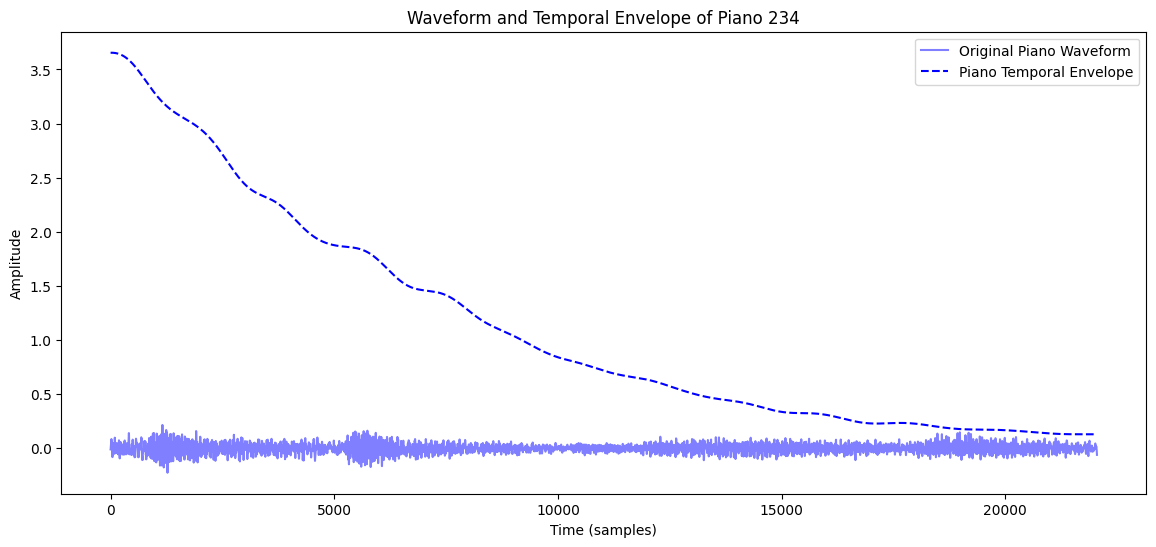

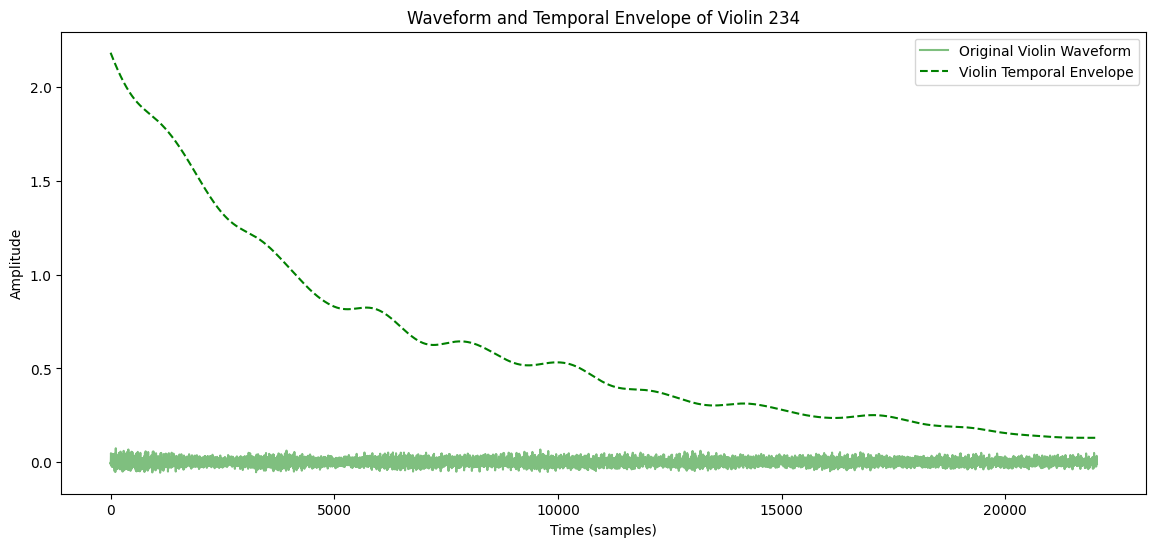

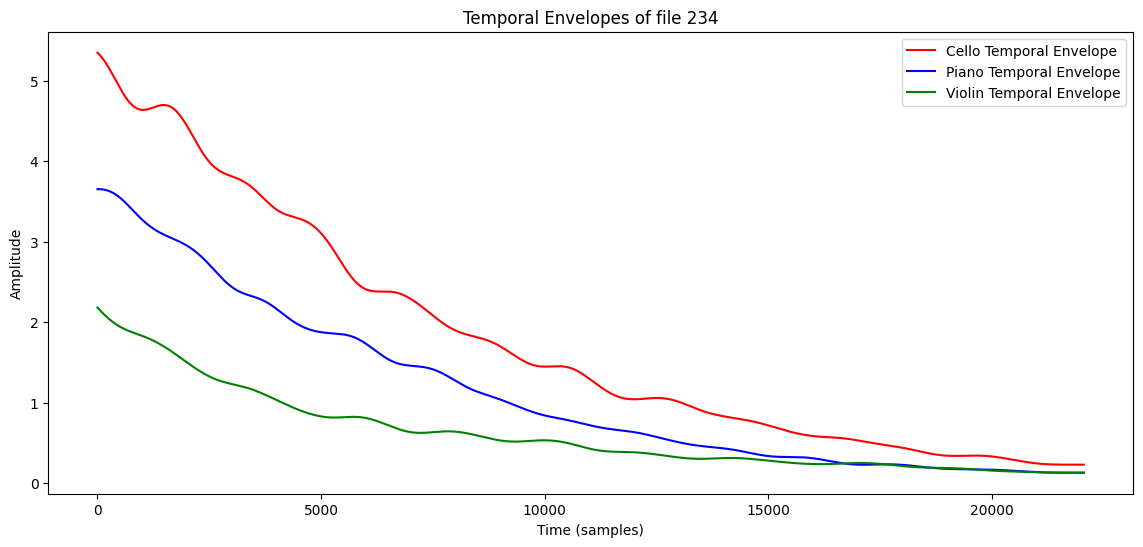

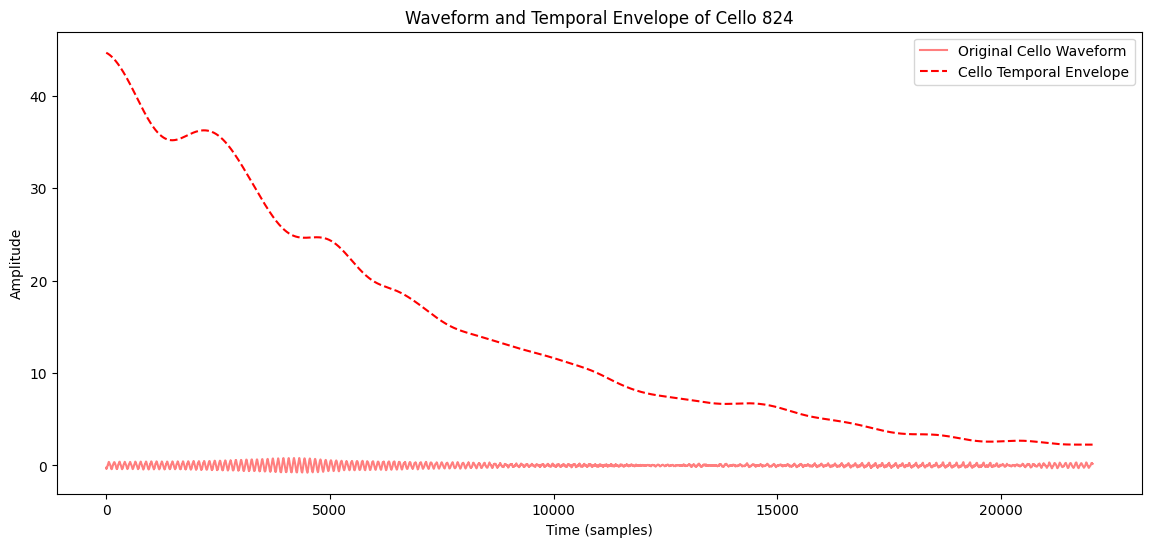

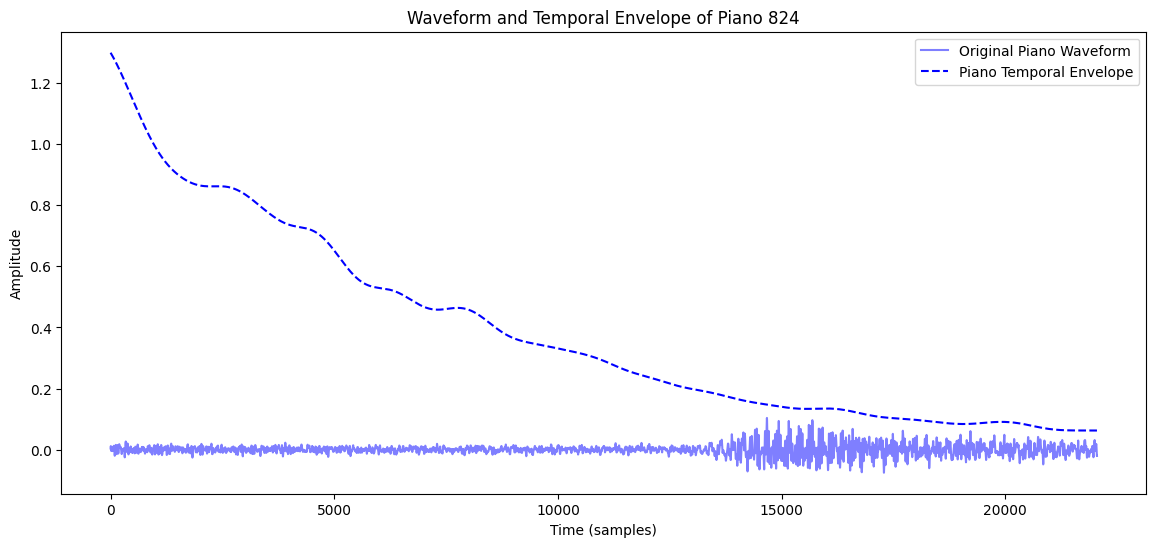

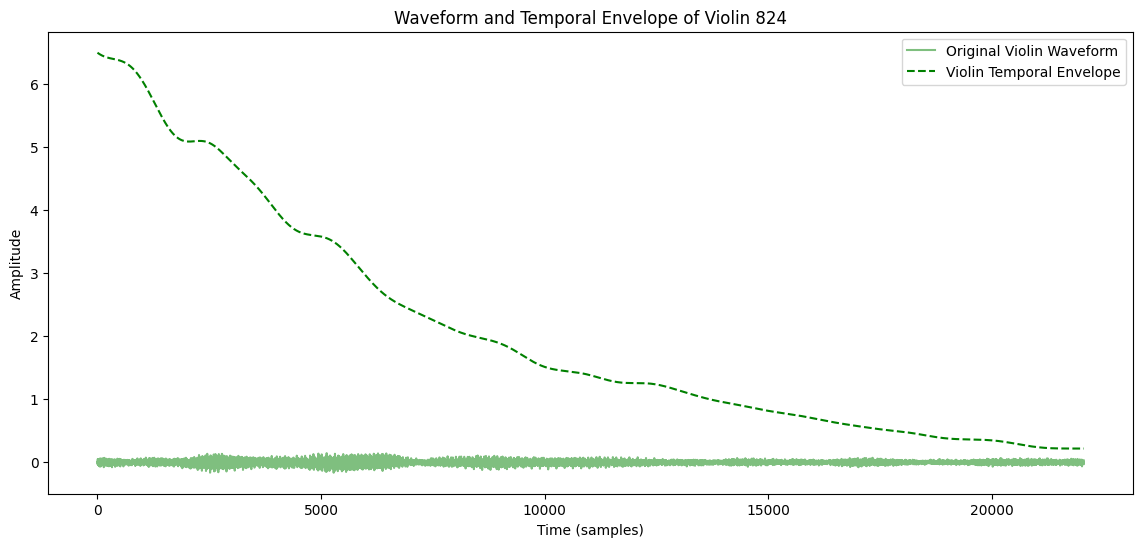

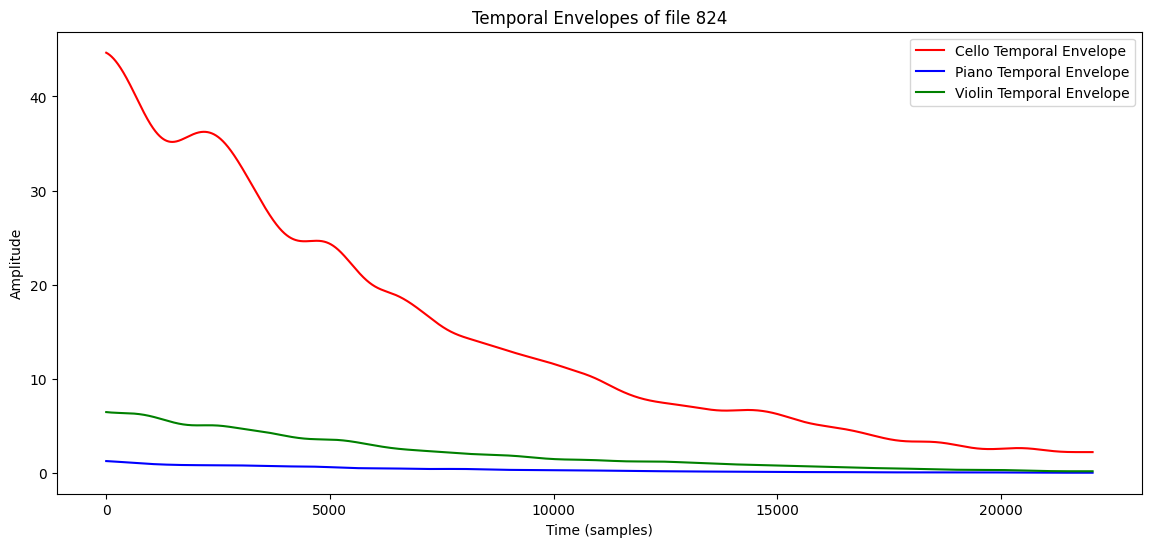

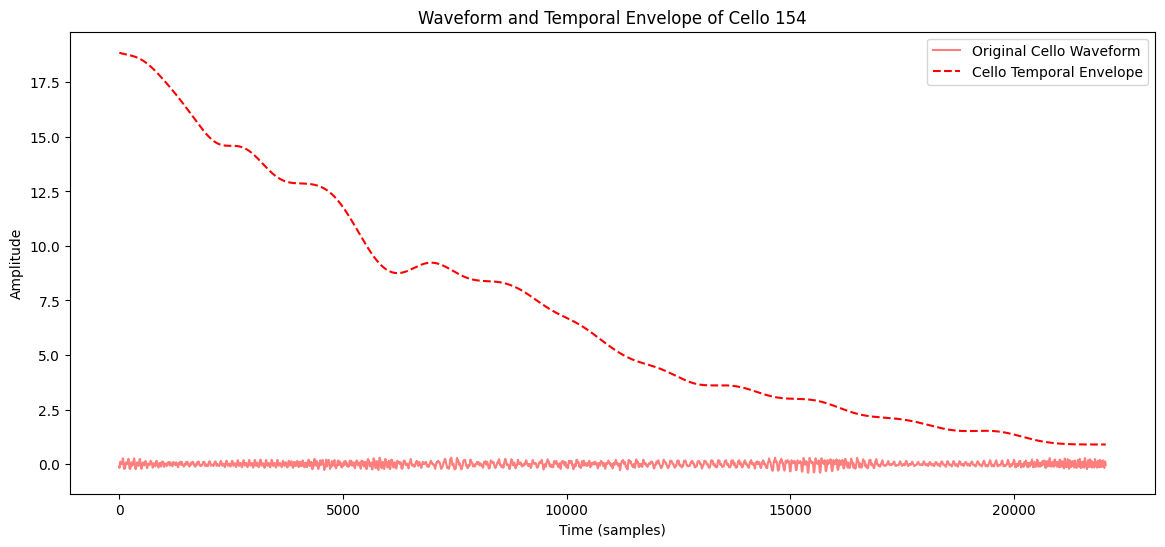

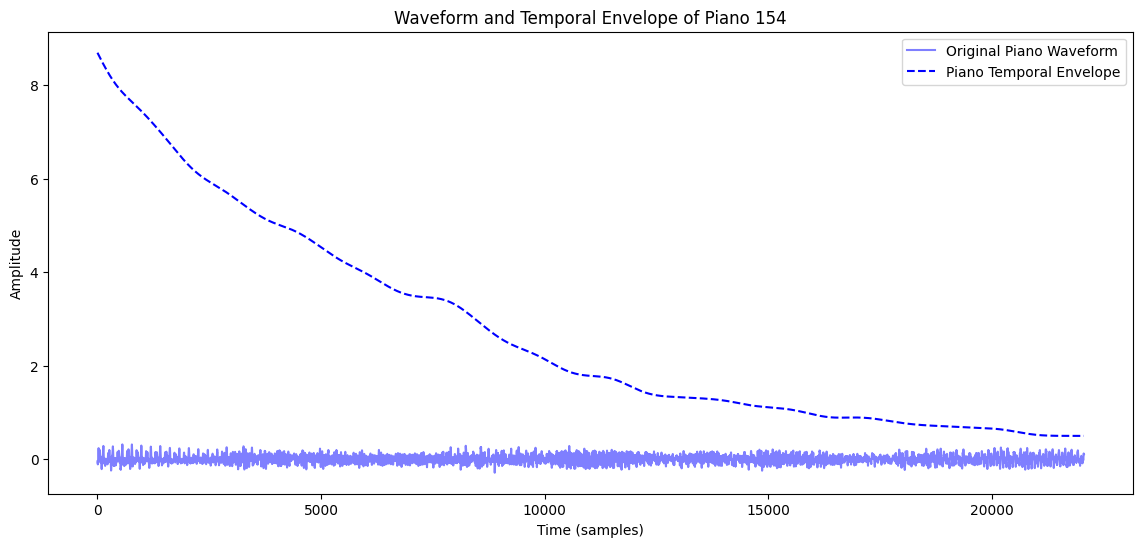

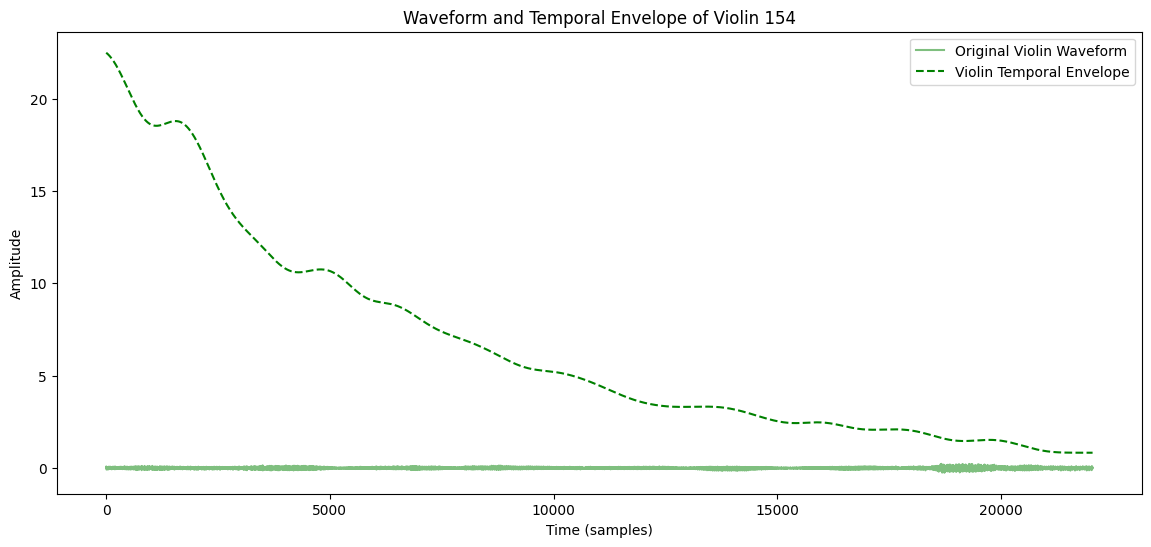

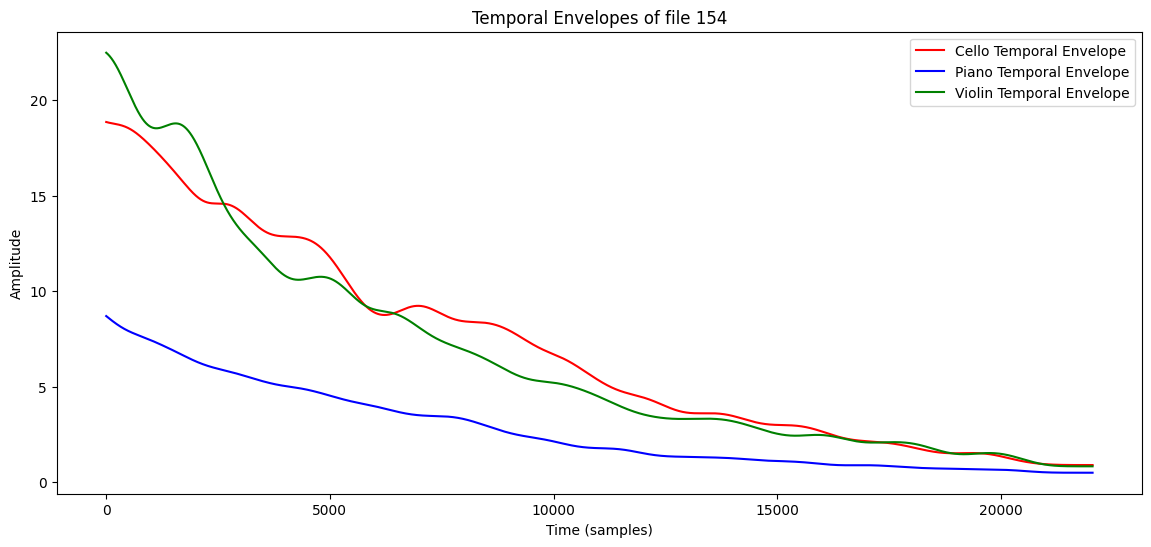

In [40]:
cutoff_frequency = 10  # in Hz

for i in range(3):
    f = random.randint(0, 1597)
    
    cello_audio_rectified = np.abs(cello_audio[f])
    cello_audio_envelope = butter_lowpass_filter(cello_audio_rectified, cutoff_frequency, cello_sr[f], order=6)
    
    piano_audio_rectified = np.abs(piano_audio[f])
    piano_audio_envelope = butter_lowpass_filter(piano_audio_rectified, cutoff_frequency, piano_sr[f], order=6)
    
    violin_audio_rectified = np.abs(violin_audio[f])
    violin_audio_envelope = butter_lowpass_filter(violin_audio_rectified, cutoff_frequency, violin_sr[f], order=6)
    
    plt.figure(figsize=(14, 6))
    plt.plot(cello_audio[f], label='Original Cello Waveform', alpha=0.5, color='red')
    plt.plot(cello_audio_envelope, label='Cello Temporal Envelope', color='red', linestyle = 'dashed')
    plt.title('Waveform and Temporal Envelope of Cello '+str(f))
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 6))
    plt.plot(piano_audio[f], label='Original Piano Waveform', alpha=0.5, color='blue')
    plt.plot(piano_audio_envelope, label='Piano Temporal Envelope', color='blue', linestyle = 'dashed')
    plt.title('Waveform and Temporal Envelope of Piano '+str(f))
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 6))
    plt.plot(violin_audio[f], label='Original Violin Waveform', alpha=0.5, color='green')
    plt.plot(violin_audio_envelope, label='Violin Temporal Envelope', color='green', linestyle = 'dashed')
    plt.title('Waveform and Temporal Envelope of Violin '+str(f))
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 6))
    plt.plot(cello_audio_envelope, label='Cello Temporal Envelope', color='red')
    plt.plot(piano_audio_envelope, label='Piano Temporal Envelope', color='blue')
    plt.plot(violin_audio_envelope, label='Violin Temporal Envelope', color='green')
    plt.title('Temporal Envelopes of file '+str(f))
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

---
### Harmonic/Percussive Source Separation (HPSS)
HPSS is a technique used to separate an audio signal into its harmonic components (such as sustained tones from musical instruments) and percussive components (such as drums and rhythm elements). For this, we plot the obtained waveforms for 3 random samples for each instrument.

**Cello:**

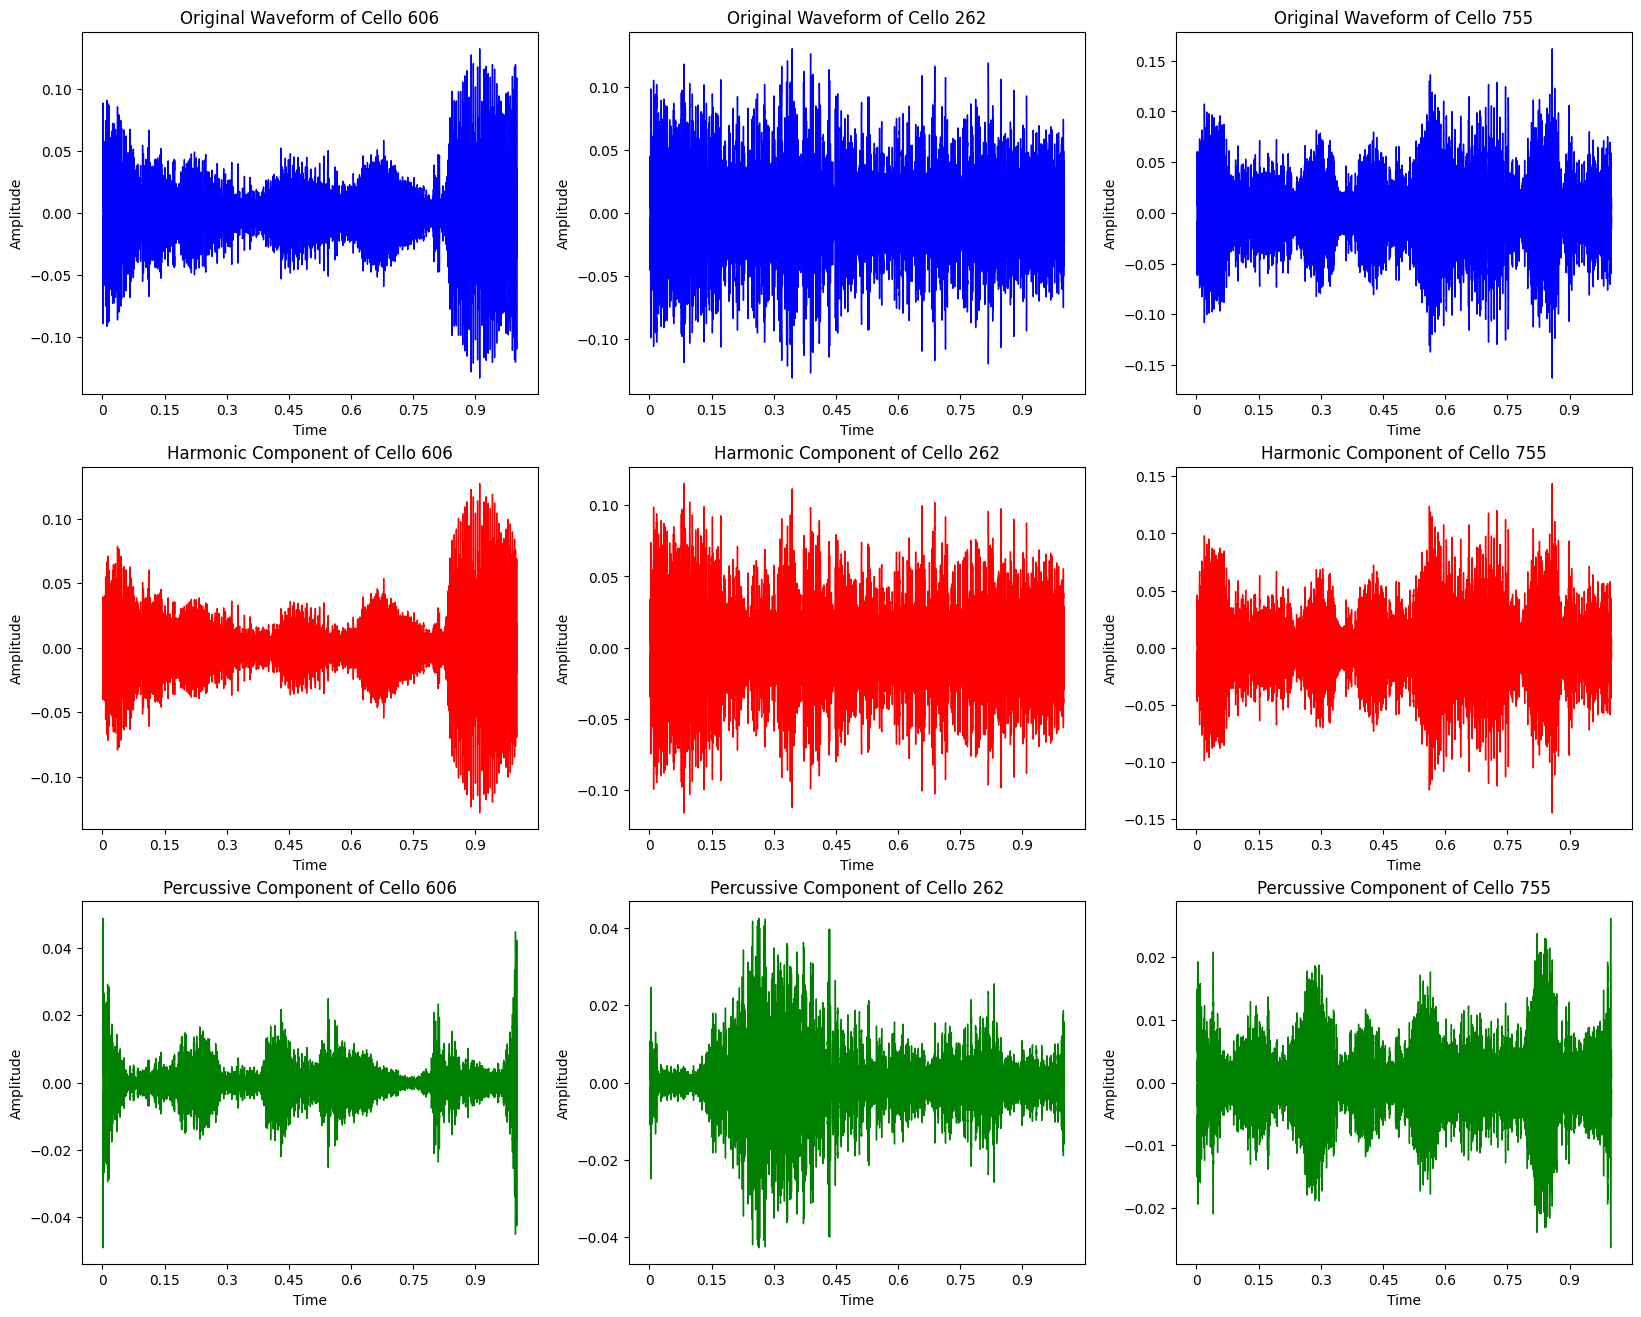

In [41]:
fig, ax = plt.subplots(3, 3, figsize=(20, 16))

for i in range(3):    
    f = random.randint(0,1597)

    harmonic, percussive = librosa.effects.hpss(cello_audio[f])

    librosa.display.waveshow(cello_audio[f], sr=cello_sr[f], ax=ax[0,i], color='b')
    ax[0,i].set_title('Original Waveform of Cello '+str(f))
    ax[0,i].set_xlabel('Time')
    ax[0,i].set_ylabel('Amplitude') 

    librosa.display.waveshow(harmonic, sr=cello_sr[f], ax=ax[1,i], color='r')
    ax[1,i].set_title('Harmonic Component of Cello '+str(f))
    ax[1,i].set_xlabel('Time')
    ax[1,i].set_ylabel('Amplitude') 

    librosa.display.waveshow(percussive, sr=cello_sr[f], ax=ax[2,i], color='g')
    ax[2,i].set_title('Percussive Component of Cello '+str(f))
    ax[2,i].set_xlabel('Time')
    ax[2,i].set_ylabel('Amplitude') 

plt.show()

**Piano:**

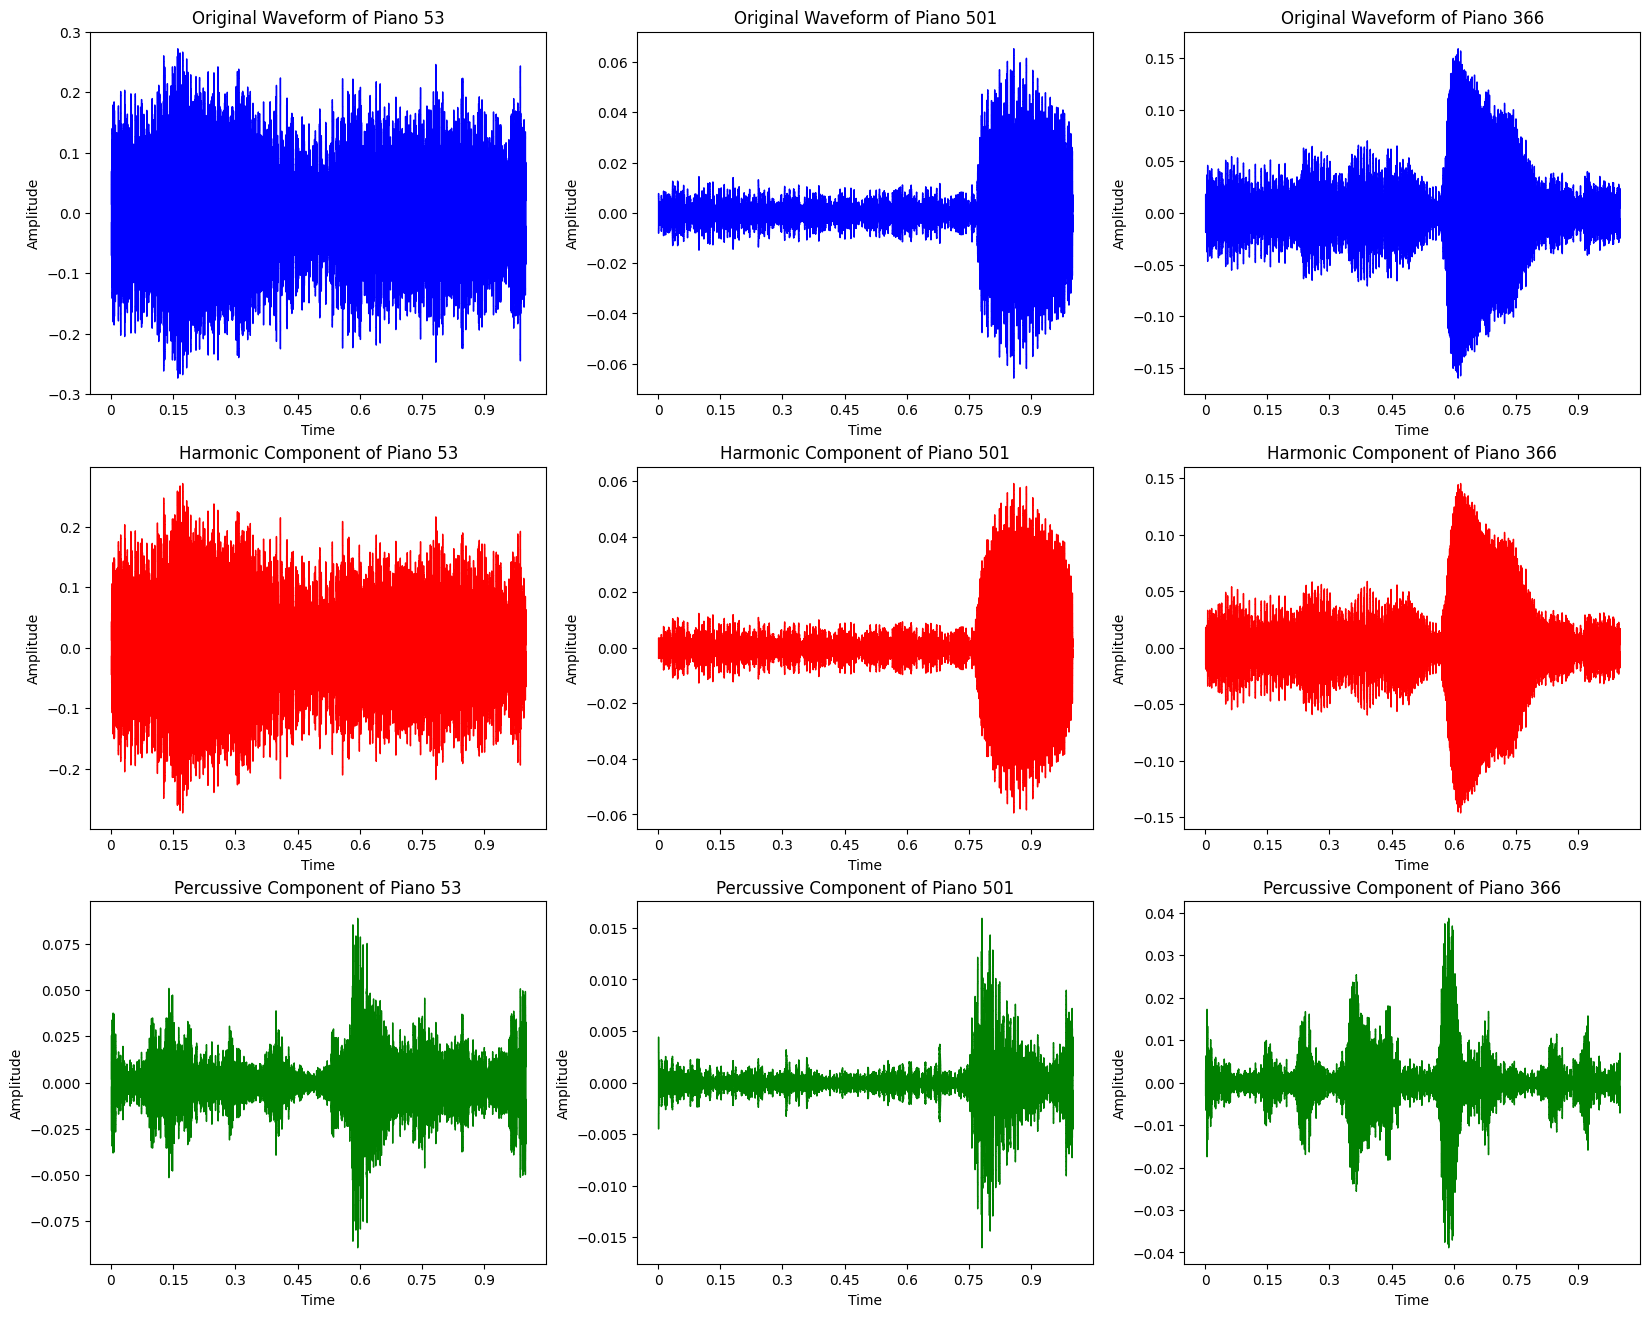

In [42]:
fig, ax = plt.subplots(3, 3, figsize=(20, 16))

for i in range(3):    
    f = random.randint(0,1597)

    harmonic, percussive = librosa.effects.hpss(piano_audio[f])

    librosa.display.waveshow(piano_audio[f], sr=piano_sr[f], ax=ax[0,i], color='b')
    ax[0,i].set_title('Original Waveform of Piano '+str(f))
    ax[0,i].set_xlabel('Time')
    ax[0,i].set_ylabel('Amplitude') 

    librosa.display.waveshow(harmonic, sr=piano_sr[f], ax=ax[1,i], color='r')
    ax[1,i].set_title('Harmonic Component of Piano '+str(f))
    ax[1,i].set_xlabel('Time')
    ax[1,i].set_ylabel('Amplitude') 

    librosa.display.waveshow(percussive, sr=piano_sr[f], ax=ax[2,i], color='g')
    ax[2,i].set_title('Percussive Component of Piano '+str(f))
    ax[2,i].set_xlabel('Time')
    ax[2,i].set_ylabel('Amplitude') 

plt.show()

**Violin:**

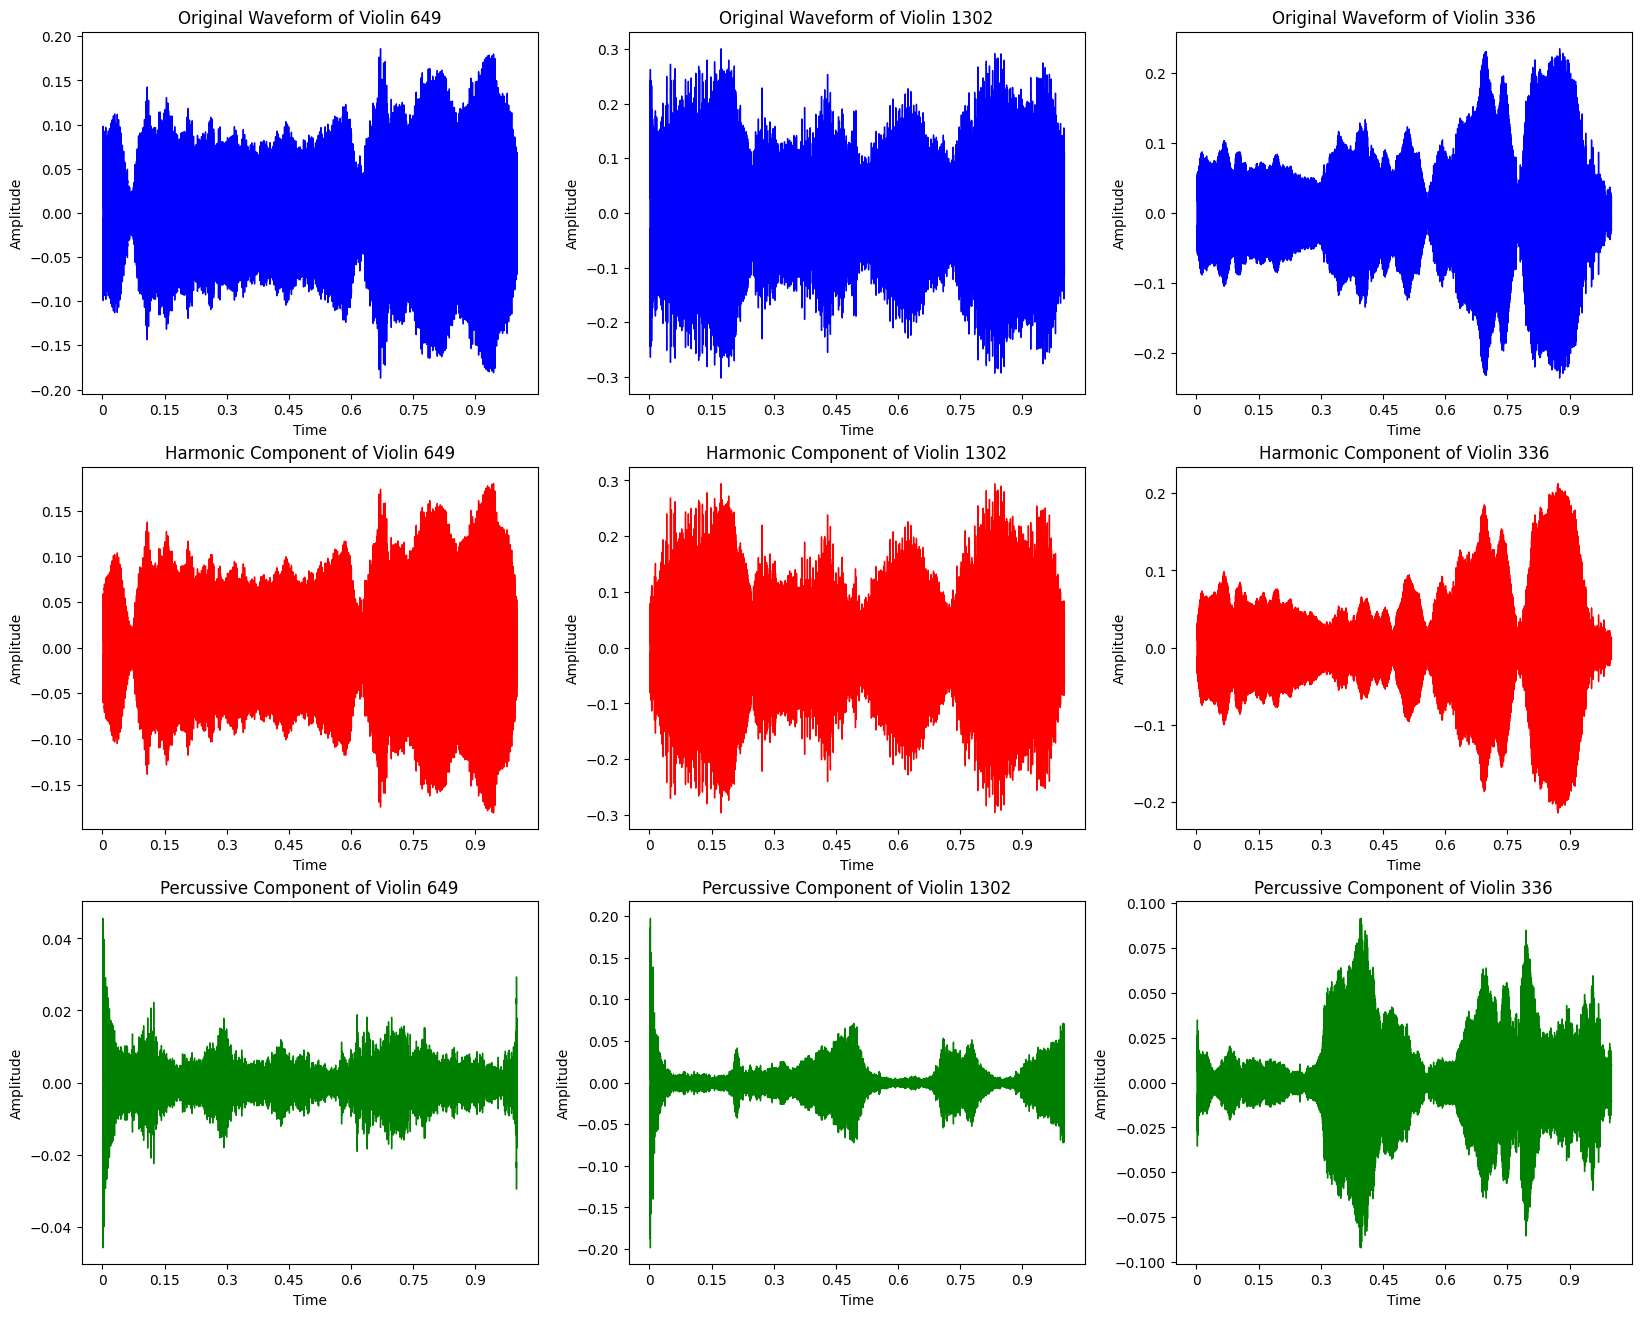

In [43]:
fig, ax = plt.subplots(3, 3, figsize=(20, 16))

for i in range(3):    
    f = random.randint(0,1597)

    harmonic, percussive = librosa.effects.hpss(violin_audio[f])

    librosa.display.waveshow(violin_audio[f], sr=violin_sr[f], ax=ax[0,i], color='b')
    ax[0,i].set_title('Original Waveform of Violin '+str(f))
    ax[0,i].set_xlabel('Time')
    ax[0,i].set_ylabel('Amplitude') 

    librosa.display.waveshow(harmonic, sr=violin_sr[f], ax=ax[1,i], color='r')
    ax[1,i].set_title('Harmonic Component of Violin '+str(f))
    ax[1,i].set_xlabel('Time')
    ax[1,i].set_ylabel('Amplitude') 

    librosa.display.waveshow(percussive, sr=violin_sr[f], ax=ax[2,i], color='g')
    ax[2,i].set_title('Percussive Component of Violin '+str(f))
    ax[2,i].set_xlabel('Time')
    ax[2,i].set_ylabel('Amplitude') 

plt.show()

---
### Feature Distribution Analysis of MFCC, Spectral Centroid, Spectral Rolloff and Zero-Crossing Rate
We will now analyse the Mel-frequency cepstral coefficients (MFCCs), spectral centroid, and zero-crossing rates of the 3 instruments. Spectral centroid represents the “center of mass” of the spectrum and shows the average frequency of the sound, which can help us understand the perceived pitch and timbre. Spectral rolloff is defined as the frequency below which a certain percentage (set as 85%) of the total energy of the spectrum is contained, and the spectral rolloff point can be used to distinguish between harmonic (musical tones) and noise-like components of the audio signal. Zero crossing rate measures how frequently the speech signal changes its polarity or crosses the zero amplitude line, representing the rate of changes in the audio waveform.

First, we obtain the features for all data files of each instrument and store each characteristic in a pandas DataFrame

In [45]:
cello_mfccs_mean = np.zeros(1597)
cello_spectral_centroids_mean = np.zeros(1597)
cello_spectral_rolloff_mean = np.zeros(1597)
cello_zero_crossing_rate_mean = np.zeros(1597)
piano_mfccs_mean = np.zeros(1597)
piano_spectral_centroids_mean = np.zeros(1597)
piano_spectral_rolloff_mean = np.zeros(1597)
piano_zero_crossing_rate_mean = np.zeros(1597)
violin_mfccs_mean = np.zeros(1597)
violin_spectral_centroids_mean = np.zeros(1597)
violin_spectral_rolloff_mean = np.zeros(1597)
violin_zero_crossing_rate_mean = np.zeros(1597)

for i in range(1597):
    mfccs = librosa.feature.mfcc(y=cello_audio[i], sr=cello_sr[i])
    spectral_centroids = librosa.feature.spectral_centroid(y=cello_audio[i], sr=cello_sr[i])
    rolloff = librosa.feature.spectral_rolloff(y=cello_audio[i], sr=cello_sr[i], roll_percent=0.85)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=cello_audio[i])
    # add the mean of the features to the array
    cello_mfccs_mean[i] = mfccs.mean(axis=1).mean()
    cello_spectral_centroids_mean[i] = spectral_centroids.mean(axis=1)[0]
    cello_spectral_rolloff_mean[i] = rolloff.mean()
    cello_zero_crossing_rate_mean[i] = zero_crossing_rate.mean(axis=1)[0]

for i in range(1597):
    mfccs = librosa.feature.mfcc(y=piano_audio[i], sr=piano_sr[i])
    spectral_centroids = librosa.feature.spectral_centroid(y=piano_audio[i], sr=piano_sr[i])
    rolloff = librosa.feature.spectral_rolloff(y=piano_audio[i], sr=piano_sr[i], roll_percent=0.85)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=piano_audio[i])
    # add the mean of the features to the array
    piano_mfccs_mean[i] = mfccs.mean(axis=1).mean()
    piano_spectral_centroids_mean[i] = spectral_centroids.mean(axis=1)[0]
    piano_spectral_rolloff_mean[i] = rolloff.mean()
    piano_zero_crossing_rate_mean[i] = zero_crossing_rate.mean(axis=1)[0]

for i in range(1597):
    mfccs = librosa.feature.mfcc(y=violin_audio[i], sr=violin_sr[i])
    spectral_centroids = librosa.feature.spectral_centroid(y=violin_audio[i], sr=violin_sr[i])
    rolloff = librosa.feature.spectral_rolloff(y=violin_audio[i], sr=violin_sr[i], roll_percent=0.85)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=violin_audio[i])
    # add the mean of the features to the array
    violin_mfccs_mean[i] = mfccs.mean(axis=1).mean()
    violin_spectral_centroids_mean[i] = spectral_centroids.mean(axis=1)[0]
    violin_spectral_rolloff_mean[i] = rolloff.mean()
    violin_zero_crossing_rate_mean[i] = zero_crossing_rate.mean(axis=1)[0]

# combine arrays
all_mfccs_mean = pd.DataFrame()
all_mfccs_mean['cello'] = pd.Series(cello_mfccs_mean)
all_mfccs_mean['piano'] = pd.Series(piano_mfccs_mean)
all_mfccs_mean['violin'] = pd.Series(violin_mfccs_mean)
all_mfccs_mean = all_mfccs_mean.melt(var_name='instru', value_name='mfcc')


all_spectral_centroids_mean = pd.DataFrame()
all_spectral_centroids_mean['cello'] = pd.Series(cello_spectral_centroids_mean)
all_spectral_centroids_mean['piano'] = pd.Series(piano_spectral_centroids_mean)
all_spectral_centroids_mean['violin'] = pd.Series(violin_spectral_centroids_mean)
all_spectral_centroids_mean = all_spectral_centroids_mean.melt(var_name='instru', value_name='sc')


all_spectral_rolloff_mean = pd.DataFrame()
all_spectral_rolloff_mean['cello'] = pd.Series(cello_spectral_rolloff_mean)
all_spectral_rolloff_mean['piano'] = pd.Series(piano_spectral_rolloff_mean)
all_spectral_rolloff_mean['violin'] = pd.Series(violin_spectral_rolloff_mean)
all_spectral_rolloff_mean = all_spectral_rolloff_mean.melt(var_name='instru', value_name='sro')


all_zero_crossing_rate_mean = pd.DataFrame()
all_zero_crossing_rate_mean['cello'] = pd.Series(cello_zero_crossing_rate_mean)
all_zero_crossing_rate_mean['piano'] = pd.Series(piano_zero_crossing_rate_mean)
all_zero_crossing_rate_mean['violin'] = pd.Series(violin_zero_crossing_rate_mean)
all_zero_crossing_rate_mean = all_zero_crossing_rate_mean.melt(var_name='instru', value_name='zcr')

**Boxplot:**

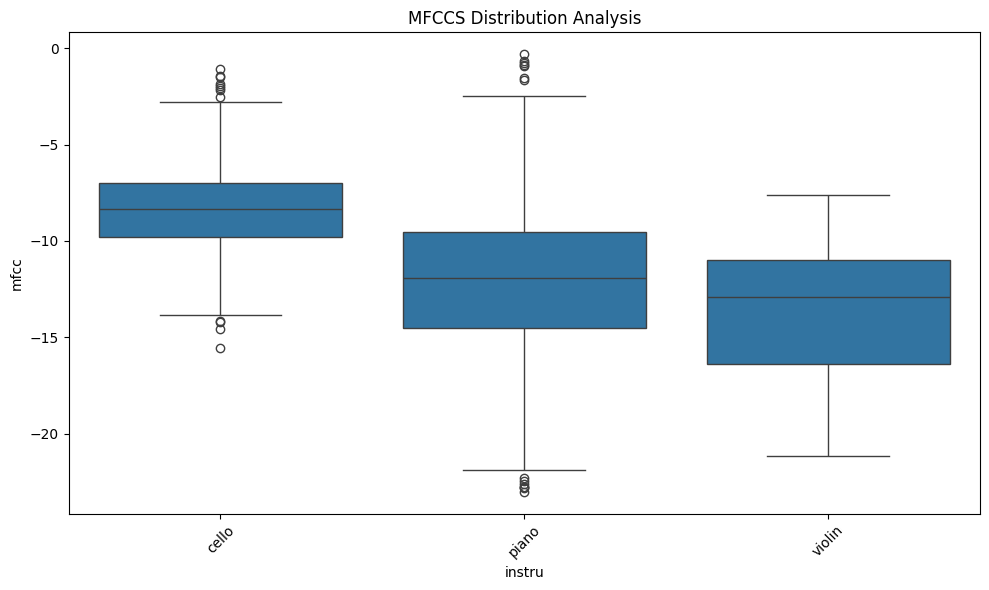

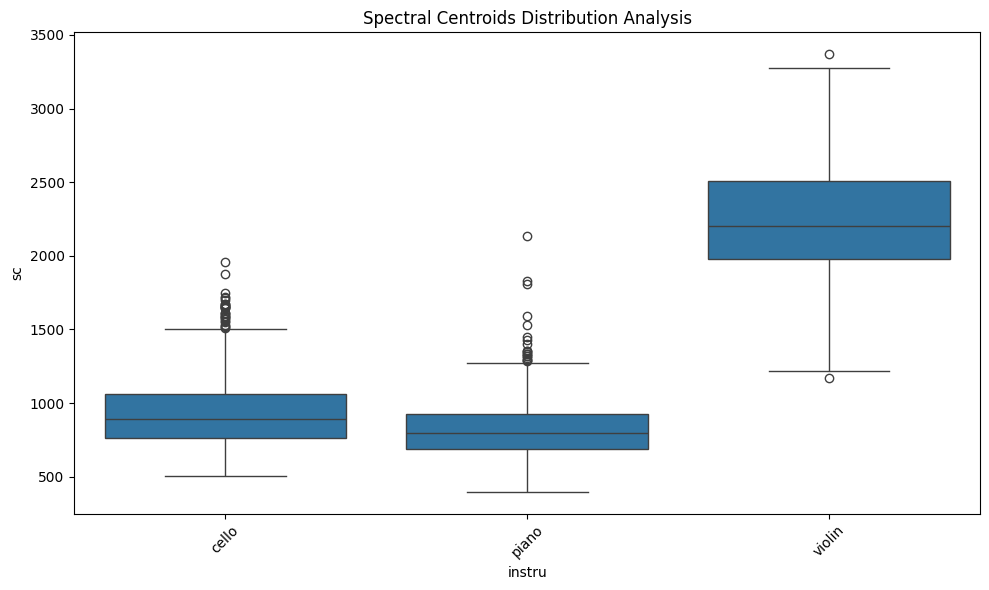

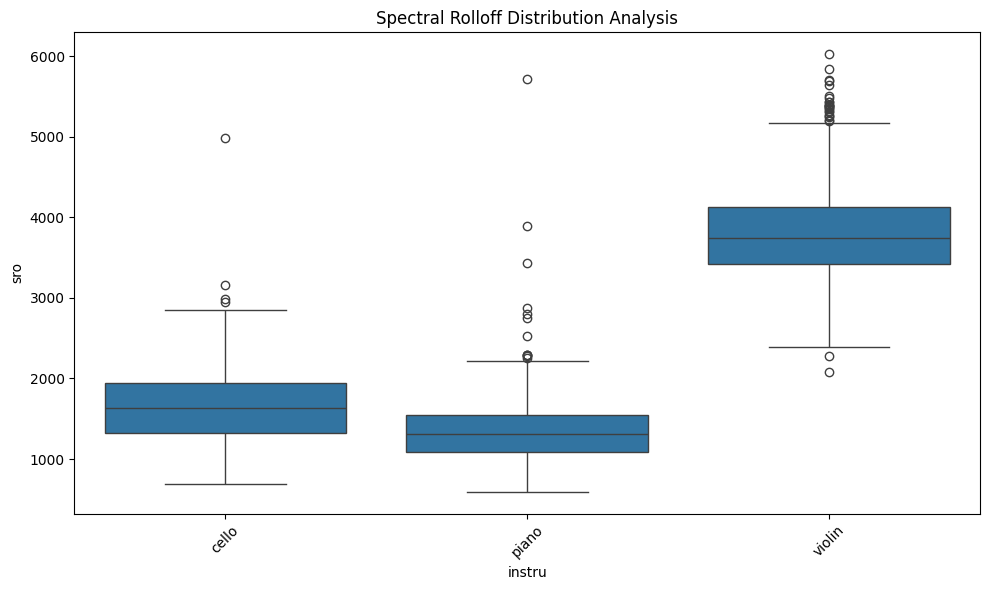

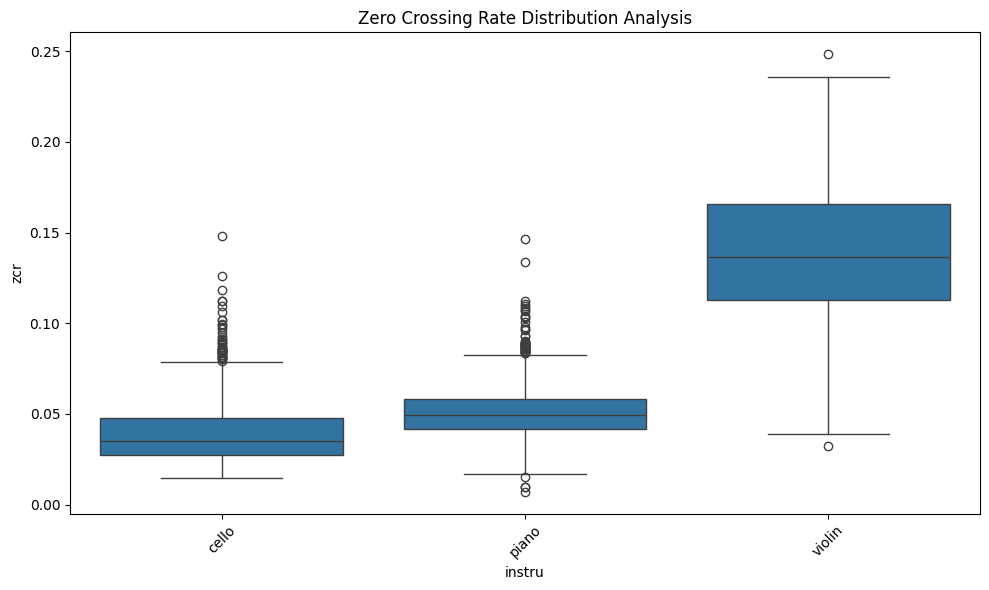

In [46]:
# Plot
plt.figure(figsize=(10, 6))
sb.boxplot(x='instru', y='mfcc', data=all_mfccs_mean)
plt.title('MFCCS Distribution Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sb.boxplot(x='instru', y='sc', data=all_spectral_centroids_mean)
plt.title('Spectral Centroids Distribution Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sb.boxplot(x='instru', y='sro', data=all_spectral_rolloff_mean)
plt.title('Spectral Rolloff Distribution Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sb.boxplot(x='instru', y='zcr', data=all_zero_crossing_rate_mean)
plt.title('Zero Crossing Rate Distribution Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We then need to create DataFrames combining the characteristics for each instrument

In [47]:
celloDF = pd.DataFrame()
celloDF['mfcc'] = pd.Series(cello_mfccs_mean)
celloDF['sc'] = pd.Series(cello_spectral_centroids_mean)
celloDF['sro'] = pd.Series(cello_spectral_rolloff_mean)
celloDF['zcr'] = pd.Series(cello_zero_crossing_rate_mean)

pianoDF = pd.DataFrame()
pianoDF['mfcc'] = pd.Series(piano_mfccs_mean)
pianoDF['sc'] = pd.Series(piano_spectral_centroids_mean)
pianoDF['sro'] = pd.Series(piano_spectral_rolloff_mean)
pianoDF['zcr'] = pd.Series(piano_zero_crossing_rate_mean)

violinDF = pd.DataFrame()
violinDF['mfcc'] = pd.Series(violin_mfccs_mean)
violinDF['sc'] = pd.Series(violin_spectral_centroids_mean)
violinDF['sro'] = pd.Series(violin_spectral_rolloff_mean)
violinDF['zcr'] = pd.Series(violin_zero_crossing_rate_mean)

**Scatterplots of each pair of characteristics:**

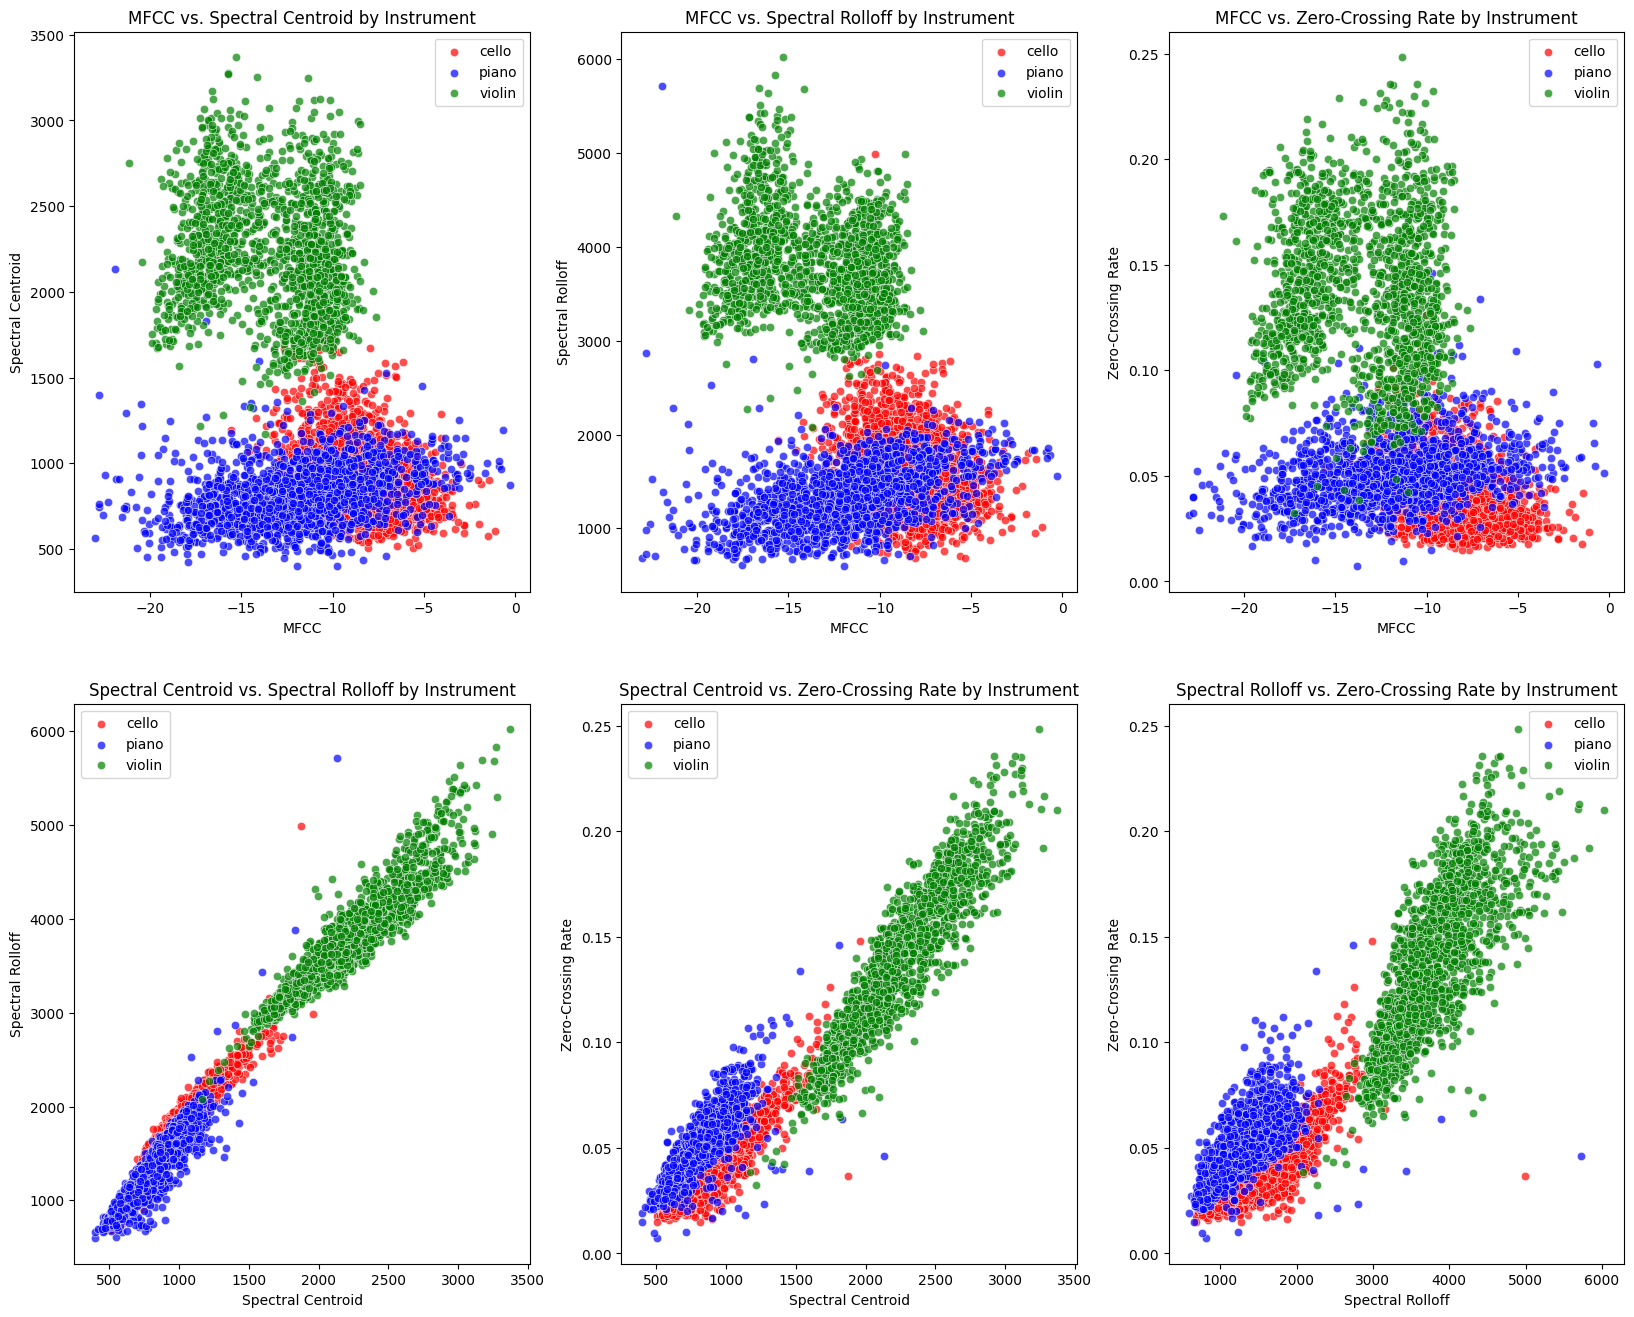

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(20, 16))
sb.scatterplot(data=celloDF, x='mfcc', y='sc', color='red', label='cello', alpha=0.7, ax=ax[0,0])
sb.scatterplot(data=pianoDF, x='mfcc', y='sc', color='blue', label='piano', alpha=0.7, ax=ax[0,0])
sb.scatterplot(data=violinDF, x='mfcc', y='sc', color='green', label='violin', alpha=0.7, ax=ax[0,0])
ax[0,0].set_title('MFCC vs. Spectral Centroid by Instrument')
ax[0,0].set_xlabel('MFCC')
ax[0,0].set_ylabel('Spectral Centroid')
ax[0,0].legend()

sb.scatterplot(data=celloDF, x='mfcc', y='sro', color='red', label='cello', alpha=0.7, ax=ax[0,1])
sb.scatterplot(data=pianoDF, x='mfcc', y='sro', color='blue', label='piano', alpha=0.7, ax=ax[0,1])
sb.scatterplot(data=violinDF, x='mfcc', y='sro', color='green', label='violin', alpha=0.7, ax=ax[0,1])
ax[0,1].set_title('MFCC vs. Spectral Rolloff by Instrument')
ax[0,1].set_xlabel('MFCC')
ax[0,1].set_ylabel('Spectral Rolloff')
ax[0,1].legend()

sb.scatterplot(data=celloDF, x='mfcc', y='zcr', color='red', label='cello', alpha=0.7, ax=ax[0,2])
sb.scatterplot(data=pianoDF, x='mfcc', y='zcr', color='blue', label='piano', alpha=0.7, ax=ax[0,2])
sb.scatterplot(data=violinDF, x='mfcc', y='zcr', color='green', label='violin', alpha=0.7, ax=ax[0,2])
ax[0,2].set_title('MFCC vs. Zero-Crossing Rate by Instrument')
ax[0,2].set_xlabel('MFCC')
ax[0,2].set_ylabel('Zero-Crossing Rate')
ax[0,2].legend()

sb.scatterplot(data=celloDF, x='sc', y='sro', color='red', label='cello', alpha=0.7, ax=ax[1,0])
sb.scatterplot(data=pianoDF, x='sc', y='sro', color='blue', label='piano', alpha=0.7, ax=ax[1,0])
sb.scatterplot(data=violinDF, x='sc', y='sro', color='green', label='violin', alpha=0.7, ax=ax[1,0])
ax[1,0].set_title('Spectral Centroid vs. Spectral Rolloff by Instrument')
ax[1,0].set_xlabel('Spectral Centroid')
ax[1,0].set_ylabel('Spectral Rolloff')
ax[1,0].legend()

sb.scatterplot(data=celloDF, x='sc', y='zcr', color='red', label='cello', alpha=0.7, ax=ax[1,1])
sb.scatterplot(data=pianoDF, x='sc', y='zcr', color='blue', label='piano', alpha=0.7, ax=ax[1,1])
sb.scatterplot(data=violinDF, x='sc', y='zcr', color='green', label='violin', alpha=0.7, ax=ax[1,1])
ax[1,1].set_title('Spectral Centroid vs. Zero-Crossing Rate by Instrument')
ax[1,1].set_xlabel('Spectral Centroid')
ax[1,1].set_ylabel('Zero-Crossing Rate')
ax[1,1].legend()

sb.scatterplot(data=celloDF, x='sro', y='zcr', color='red', label='cello', alpha=0.7, ax=ax[1,2])
sb.scatterplot(data=pianoDF, x='sro', y='zcr', color='blue', label='piano', alpha=0.7, ax=ax[1,2])
sb.scatterplot(data=violinDF, x='sro', y='zcr', color='green', label='violin', alpha=0.7, ax=ax[1,2])
ax[1,2].set_title('Spectral Rolloff vs. Zero-Crossing Rate by Instrument')
ax[1,2].set_xlabel('Spectral Rolloff')
ax[1,2].set_ylabel('Zero-Crossing Rate')
ax[1,2].legend()

plt.show()

**Analysis:**  
From the Boxplots and Scatterplots, we can see that the MFCC, spectral centroid, spectral rolloffs and zero-crossing rates for audio from each instrument can be grouped together, with the those for Violin the most differentiable from the rest. This presents valuable insights as to the features or pairs of features that are important for categorising the audio samples.